In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
pwd

'/content'

In [3]:
df = pd.read_csv('adult.csv')

In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
df.shape

(48842, 15)

In [6]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [7]:
col = df.columns
col

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [8]:
for i in col:
  print(i)
  print()
  print(df[i].unique())
  print('----------------------------------------------------------------')

age

[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
----------------------------------------------------------------
workclass

['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
----------------------------------------------------------------
fnlwgt

[226802  89814 336951 ... 129912 255835 257302]
----------------------------------------------------------------
education

['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
----------------------------------------------------------------
educational-num

[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
----------------------------------------------------------------
marital-s

In [9]:
categorical_val=df.select_dtypes("object")
categorical_val

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [10]:
untrace_val=[i for i in categorical_val.columns if categorical_val[categorical_val[i]=="?"].shape[0]!=0]
untrace_val

['workclass', 'occupation', 'native-country']

<pre>This three columns have '?' value.</pre>

In [11]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [12]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [13]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

<pre>native-country - 504 '?' value
workclass - 1702 '?' value
occupation - 1707 '?' value
so,removing this value will not be a good approach so we try to replace with it mode.</pre>

In [14]:
catg_var=[]
num_var=[]

for col in df.columns:
        if (df[col].dtypes == 'object'):
            catg_var.append(col)
        else:
            num_var.append(col)

## Replacing '?' value of workclass column by mode

In [15]:
df[df["workclass"]=="?"][["education","marital-status","relationship","race","gender","native-country"]].mode()

,education,marital-status,relationship,race,gender,native-country
0,Some-college,Never-married,Own-child,White,Male,United-States


In [16]:
colname = 'workclass'
pd.DataFrame([df[df["education"]=="Some-college"][colname].mode()[0],
df[df["marital-status"]=="Never-married"][colname].mode()[0],
df[df["relationship"]=="Own-child"][colname].mode()[0],
df[df["race"]=="White"][colname].mode()[0],
df[df["gender"]=="Male"][colname].mode()[0],
df[df["native-country"]=="United-States"][colname].mode()[0]]).mode()

,0
0,Private


In [17]:
df["workclass"].replace("?","Private",inplace=True)

## Replacing '?' value of occupation column by mode

In [18]:
df[df["occupation"]=="?"][["education","marital-status","relationship","race","gender","native-country","workclass"]].mode()

,education,marital-status,relationship,race,gender,native-country,workclass
0,Some-college,Never-married,Own-child,White,Male,United-States,Private


In [19]:
colname="occupation"
pd.DataFrame([df[df["education"]=="Some-college"][colname].mode()[0],
df[df["marital-status"]=="Never-married"][colname].mode()[0],
df[df["relationship"]=="Own-child"][colname].mode()[0],
df[df["race"]=="White"][colname].mode()[0],
df[df["gender"]=="Male"][colname].mode()[0],
df[df["native-country"]=="United-States"][colname].mode()[0],
df[df["workclass"]=="Private"][colname].mode()[0]]).mode()

,0
0,Craft-repair


In [20]:
df["occupation"].replace("?","Craft-repair",inplace=True)

## Replacing '?' value of native-country column by mode

In [21]:
df[df["native-country"]=="?"][["education","marital-status","relationship","race","gender","workclass","occupation"]].mode()

,education,marital-status,relationship,race,gender,workclass,occupation
0,Bachelors,Married-civ-spouse,Husband,White,Male,Private,Prof-specialty


In [22]:
colname="native-country"
pd.DataFrame([df[df["education"]=="Bachelors"][colname].mode()[0],
df[df["marital-status"]=="Married-civ-spouse"][colname].mode()[0],
df[df["relationship"]=="Husband"][colname].mode()[0],
df[df["race"]=="White"][colname].mode()[0],
df[df["gender"]=="Male"][colname].mode()[0],
df[df["occupation"]=="Prof-specialty"][colname].mode()[0],
df[df["workclass"]=="Private"][colname].mode()[0]]).mode()

,0
0,United-States


In [23]:
df["native-country"].replace("?","United-States",inplace=True)

## Checking if '?' is still occuring or not...

In [24]:
df['native-country'].value_counts()

United-States                 44689
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [25]:
df['workclass'].value_counts()

Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [26]:
df['occupation'].value_counts()

Craft-repair         8921
Prof-specialty       6172
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

There is no value '?' left in any column

## Analyse Categorical Columns

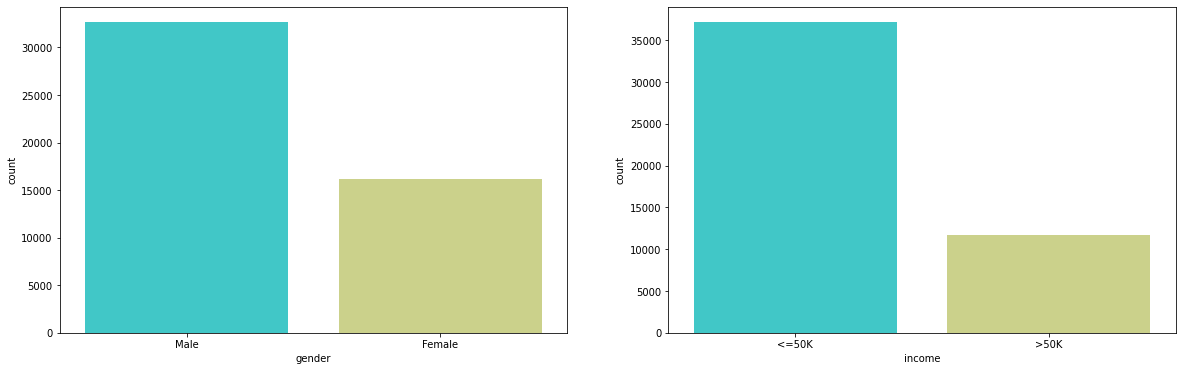

In [27]:
plt.figure(figsize=(20,6))
plt.subplot(121)
ax=sns.countplot(x="gender",data=df,palette="rainbow")
plt.subplot(122)
ax=sns.countplot(x="income",data=df,palette="rainbow")

<pre>Male have higher frequency compare to female,<br>
and frequency of male and female who having less then 50k income is high.</pre>

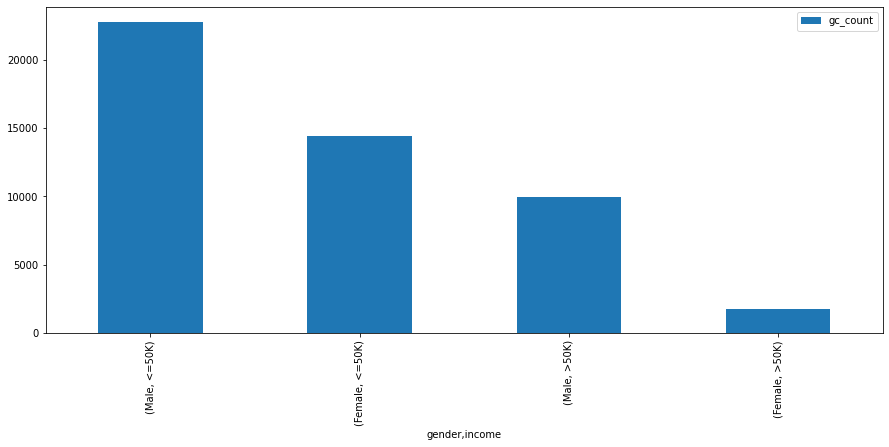

In [28]:
dfw=df.groupby(["gender","income"])[["gender"]].count()
dfw.rename(columns={"gender":"gc_count"},inplace=True)
dfw.sort_values("gc_count",inplace=True,ascending=False)
dfw.plot(kind="bar",figsize=(15,6))

Let see workclass with respect to gender and income

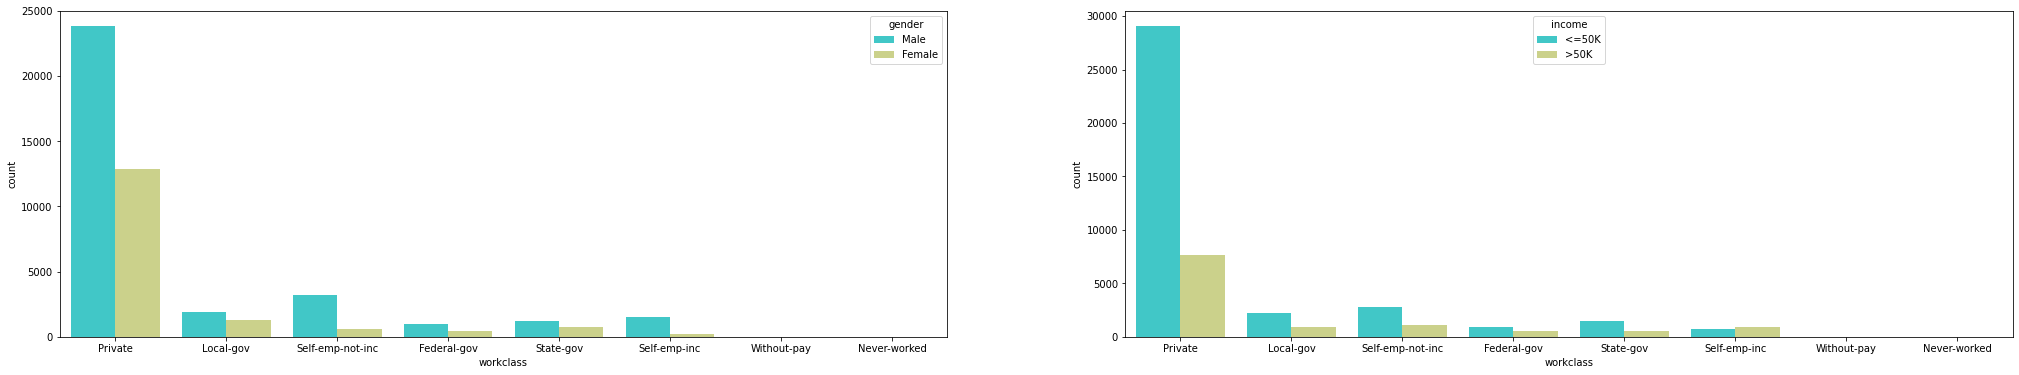

In [29]:
plt.figure(figsize=(35,6))
plt.subplot(121)
ax=sns.countplot(x="workclass",hue="gender",data=df,palette="rainbow")
plt.subplot(122)
ax=sns.countplot(x="workclass",hue="income",data=df,palette="rainbow")


According to dataset,workclass with respect to gender and income 'private' sector have high frequency in both.

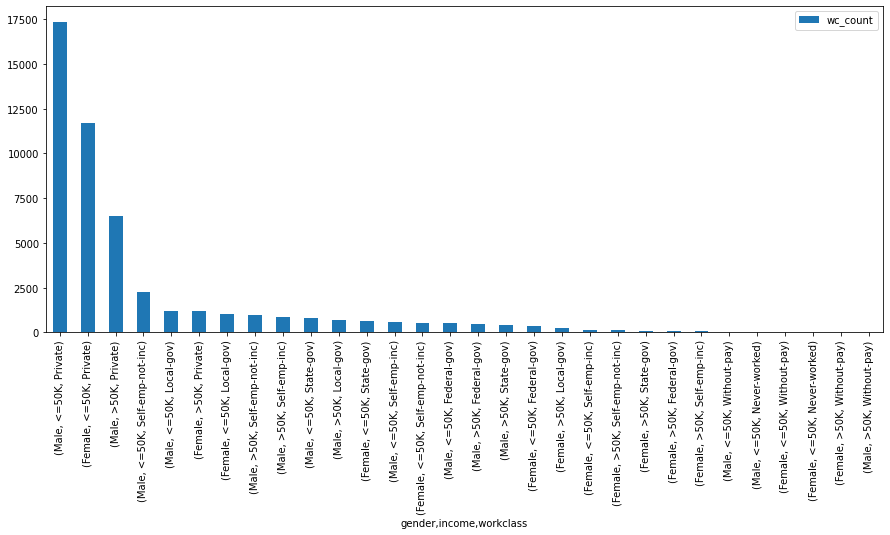

In [30]:
dfw=df.groupby(["gender","income","workclass"])[["workclass"]].count()
dfw.rename(columns={"workclass":"wc_count"},inplace=True)
dfw.sort_values("wc_count",inplace=True,ascending=False)
dfw.plot(kind="bar",figsize=(15,6))

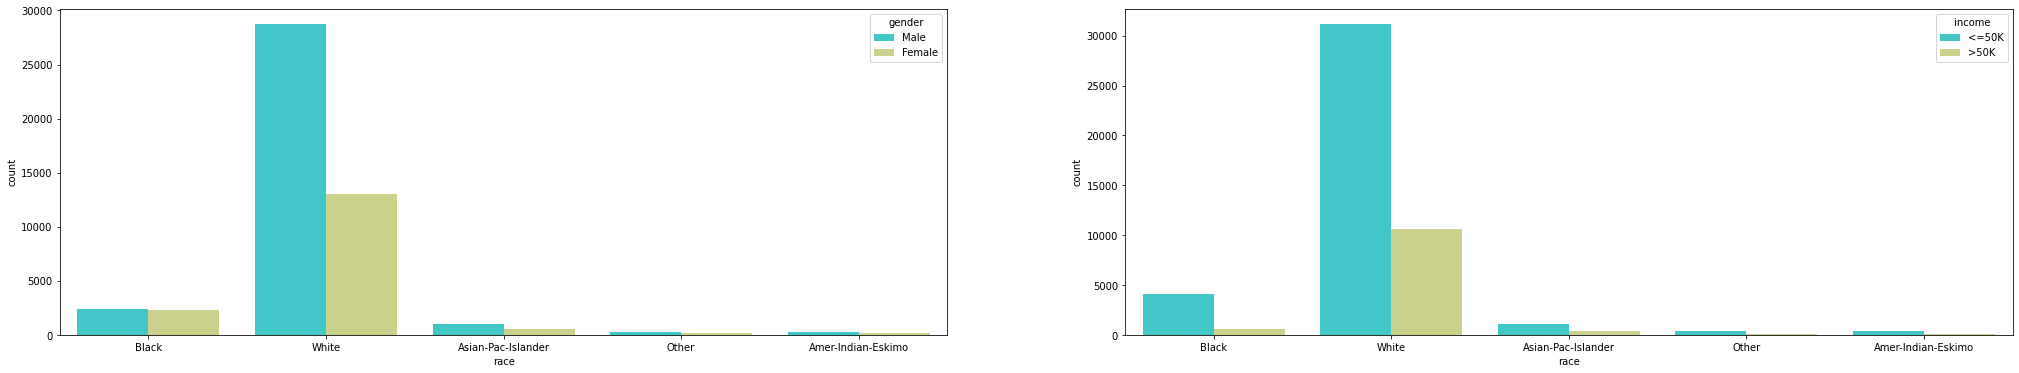

In [31]:
plt.figure(figsize=(35,6))
plt.subplot(121)
ax=sns.countplot(x="race",hue="gender",data=df,palette="rainbow")
plt.subplot(122)
ax=sns.countplot(x="race",data=df,hue="income",palette="rainbow")

we see that males in White race have more frequency and also they have income <50K and as we saw aboove most males belong to private class.So we assume that White Males In Private Class have More frequency of income being <50K

### Lets Now Look at Education wrt to gender and Income.


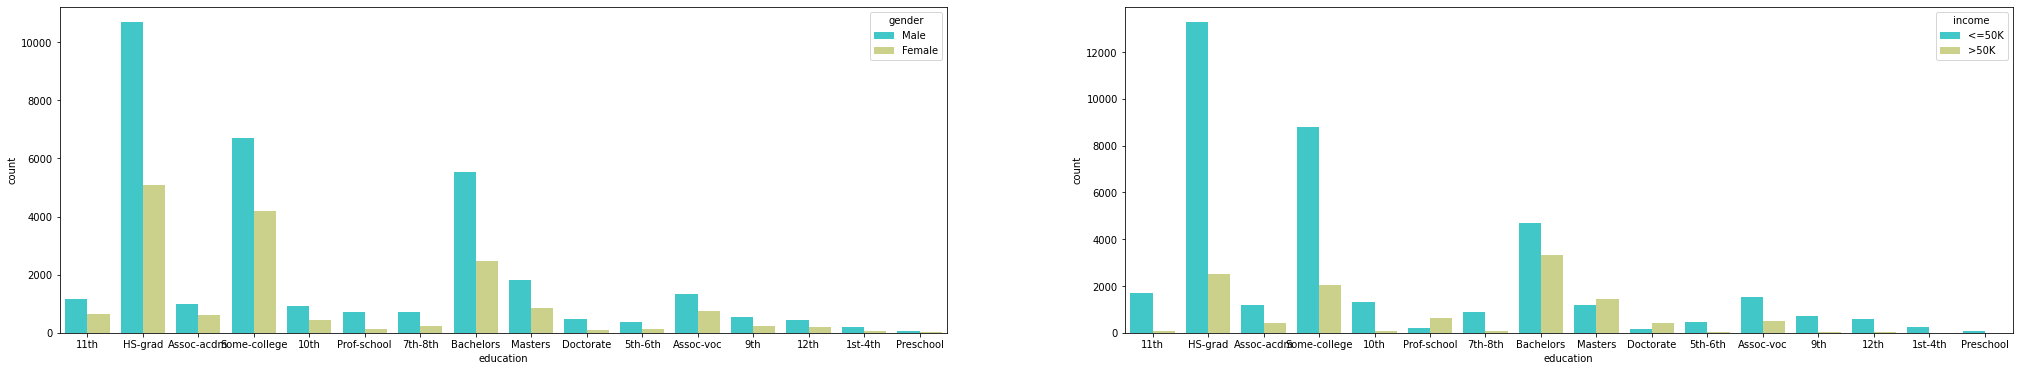

In [32]:
plt.figure(figsize=(35,6))
plt.subplot(121)
ax=sns.countplot(x="education",hue="gender",data=df,palette="rainbow")
plt.subplot(122)
ax=sns.countplot(x="education",data=df,hue="income",palette="rainbow")

We observe that Majority of Males are there and have income <50K and we assume that they are from white race and belong to private workspace and are HS grads

### Now lets look at Marital status wrt to gender and income


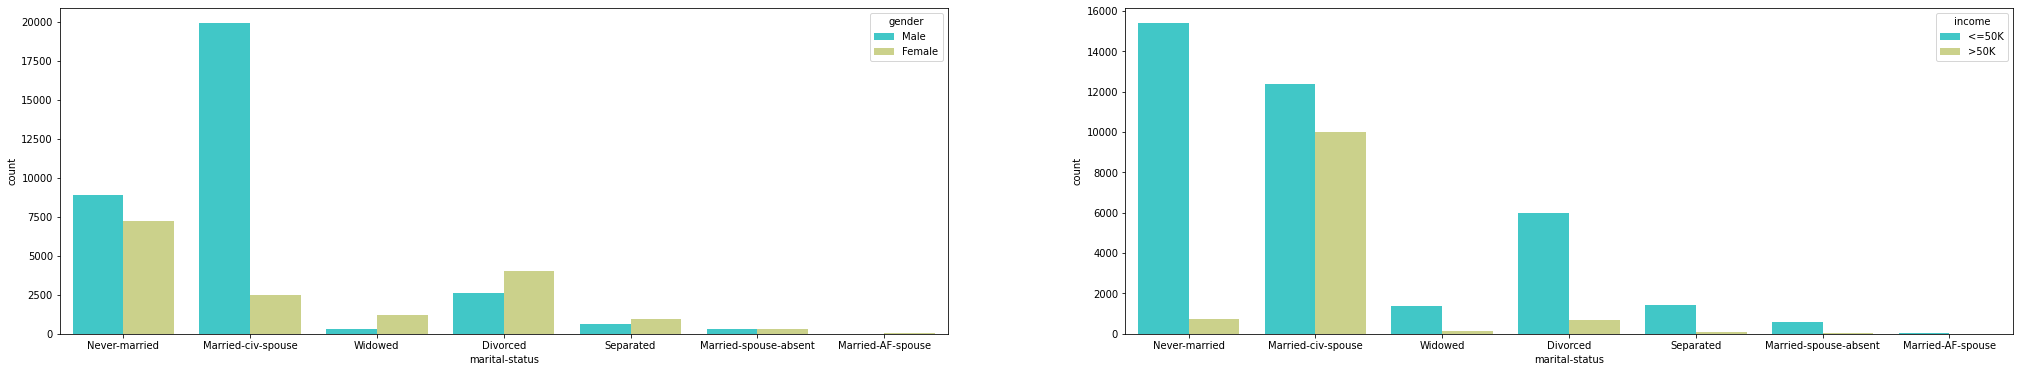

In [33]:
plt.figure(figsize=(35,6))
plt.subplot(121)
ax=sns.countplot(x="marital-status",hue="gender",data=df,palette="rainbow")
plt.subplot(122)
ax=sns.countplot(x="marital-status",hue="income",data=df,palette="rainbow")


From aboove we observer that Males who never married have high frequency of income <50K but wrt to gender we see Males who have civ spouse have higher counts. So we assume that Males who never married having <50K income from private workspace and race as white with eu as HS grad are Highest.

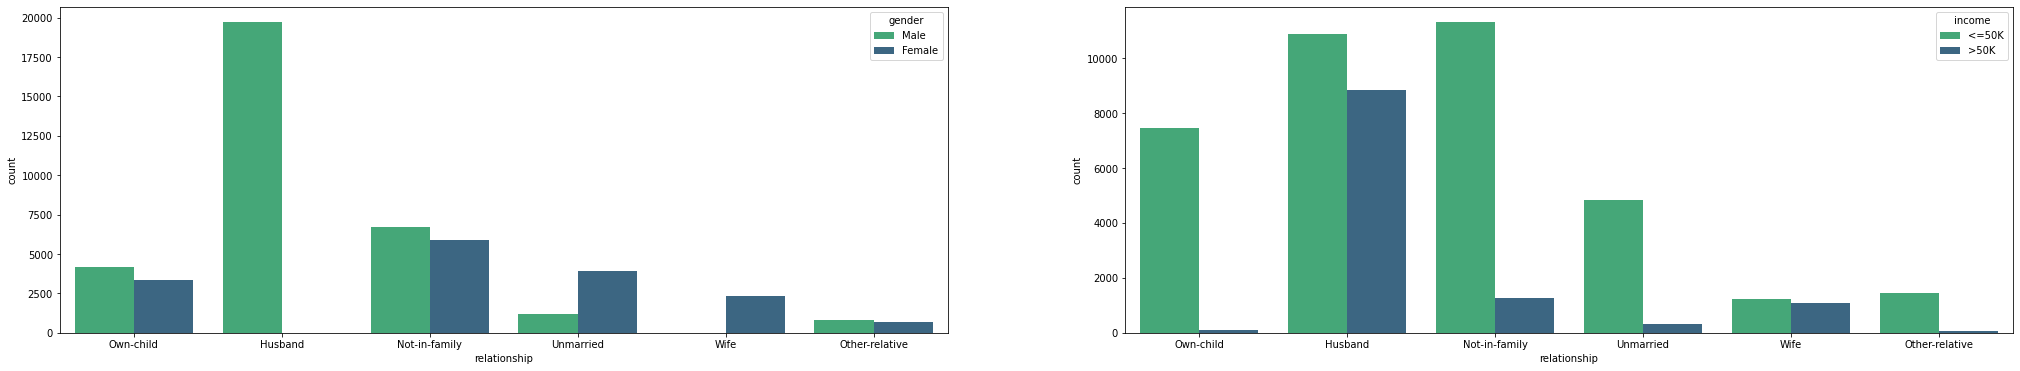

In [34]:
plt.figure(figsize=(35,6))
plt.subplot(121)
ax=sns.countplot(x="relationship",hue="gender",data=df,palette="viridis_r")
plt.subplot(122)
ax=sns.countplot(x="relationship",hue="income",data=df,palette="viridis_r")


From aboove we observe that Males who dont have a family have high frequency of income<50K but Gender wise Husbands have high frequency. We saw that the high ratio goes wrt to gender i.e The Highest count was wrt to Married civ spuse and not wrt to unmarried being income hight to it. So now keeping that in mind we assume that Since most of them are Males and are married civil spouse, Obviosuly they will be husbands and state That Husbands who are civil spouse having HS grad education belonging to white race working in private sector have highest count

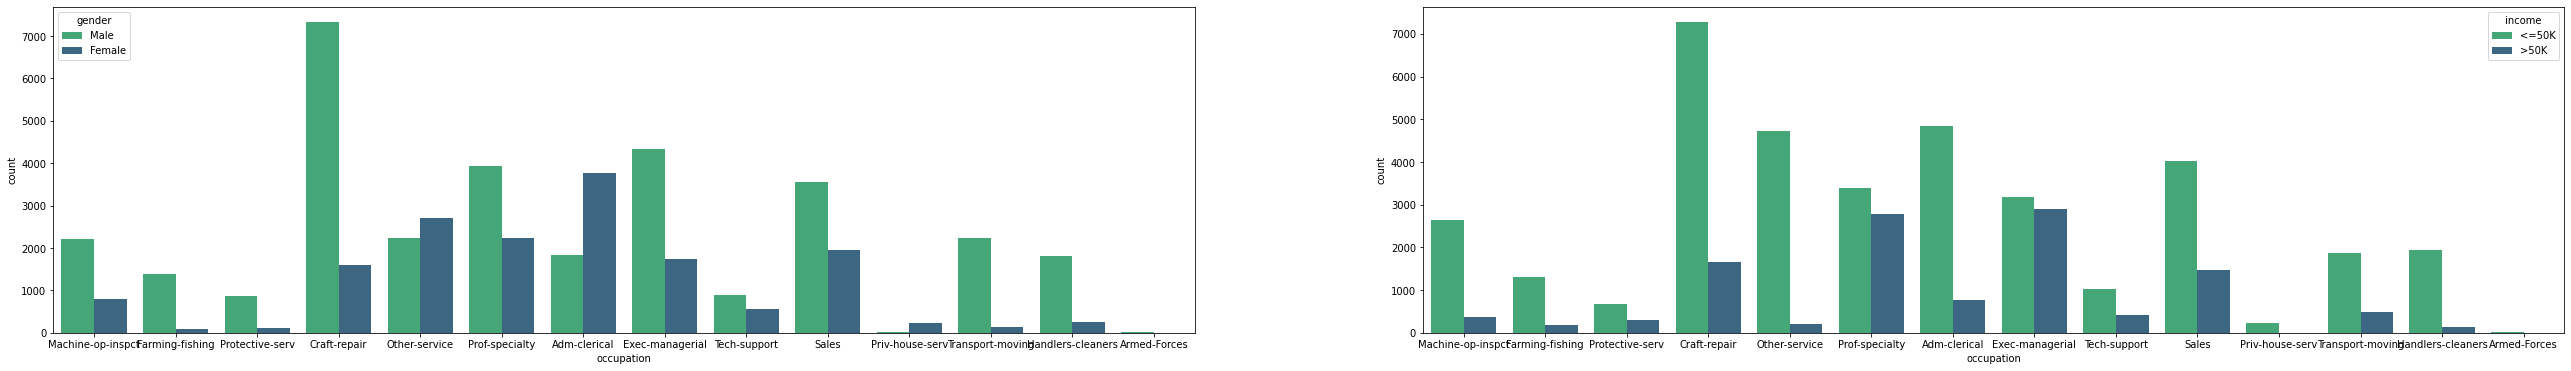

In [35]:
plt.figure(figsize=(45,6))
plt.subplot(121)
ax=sns.countplot(x="occupation",hue="gender",data=df,palette="viridis_r")
plt.subplot(122)
ax=sns.countplot(x="occupation",hue="income",data=df,palette="viridis_r")

From aboove we Observe that Males have higher Frequency with income <50K and Have occupation In the Field of Crafts and repair.So now we assume that Males who work in Private Class having HS grad as education and are married civil spouse belonging to white race have profession as crafts.

### Now Lets See Which country they belong wrt to Gender and Income.


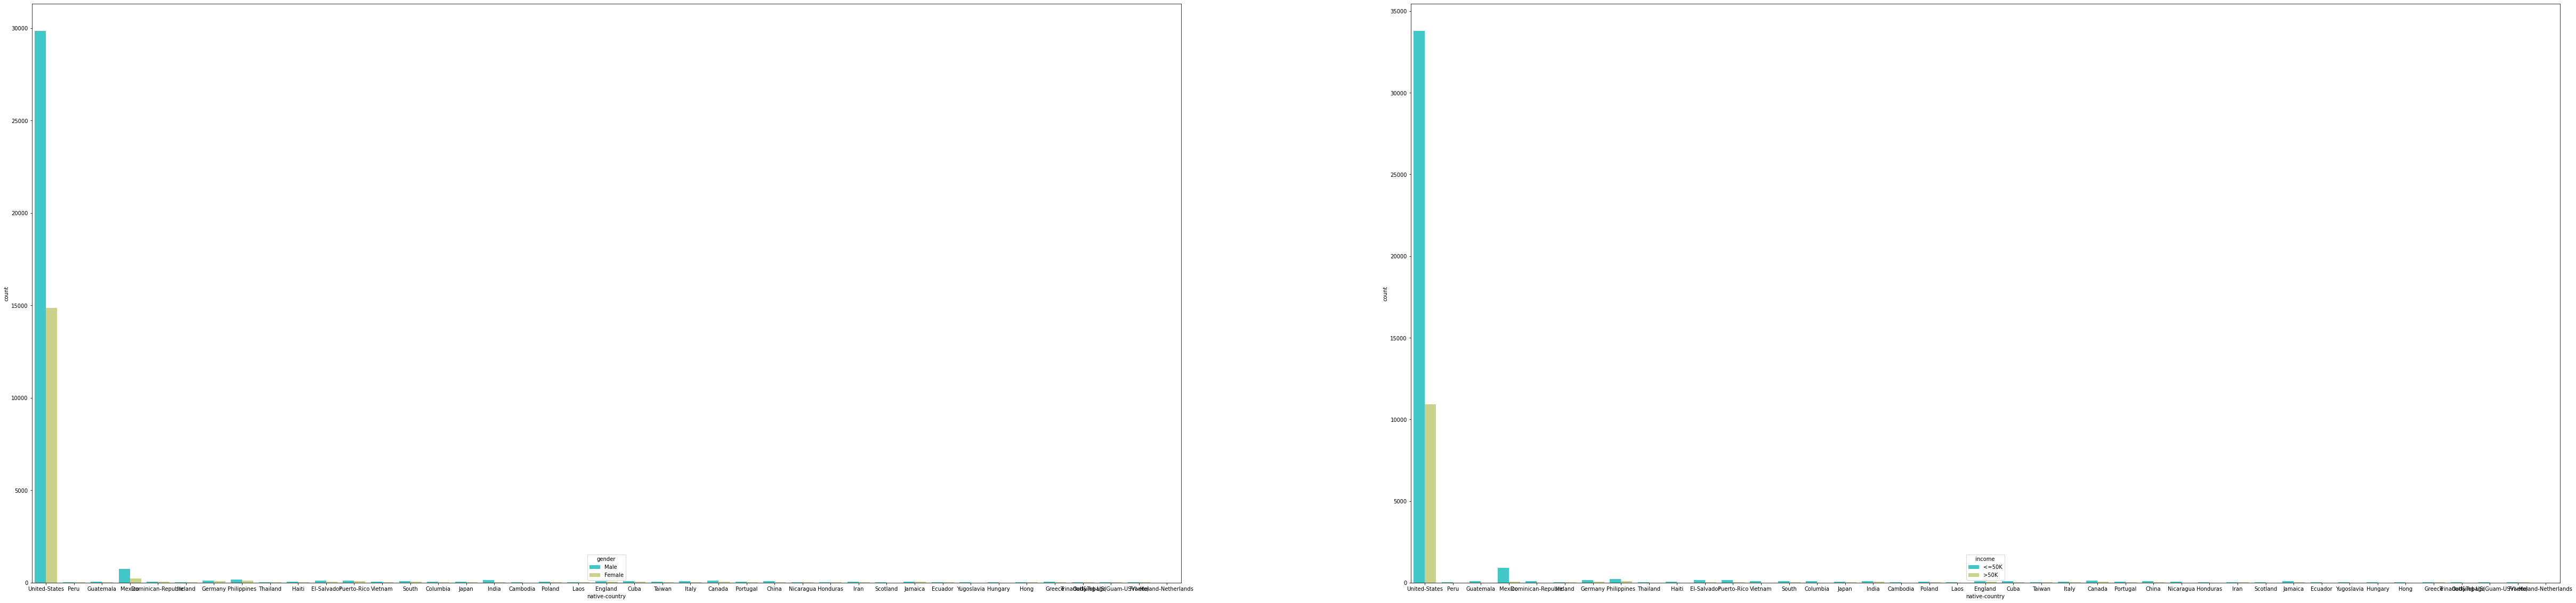

In [36]:
plt.figure(figsize=(85,20))
plt.subplot(121)
ax=sns.countplot(x="native-country",hue="gender",data=df,palette="rainbow")
plt.subplot(122)
ax=sns.countplot(x="native-country",hue="income",data=df,palette="rainbow")


From aboove we see Most of males having Income <50K are from USA and Most of them are Males. So Now we assume That These are from USA so belong to white race working in private class as Crafts repair and are civil spouses with education as HS grad

([<matplotlib.patches.Wedge at 0x7f885bca5550>,
 [Text(0.4681260580534064, 0.9954185018229162, 'Male_<=50K_Private_White_HS-grad_Married-civ-spouse_Husband_Craft-repair_United-States'),
  Text(-1.0674453609185204, 0.2656320791123123, 'Male_>50K_Private_White_Bachelors_Married-civ-spouse_Husband_Exec-managerial_United-States'),
  Text(-0.6826951390967885, -0.8625122300892994, 'Male_>50K_Private_White_HS-grad_Married-civ-spouse_Husband_Craft-repair_United-States'),
  Text(0.3204207725263261, -1.0522977375883846, 'Male_<=50K_Private_White_HS-grad_Married-civ-spouse_Husband_Machine-op-inspct_United-States'),
  Text(1.0088438472038888, -0.43844508431371065, 'Male_<=50K_Private_White_Some-college_Married-civ-spouse_Husband_Craft-repair_United-States')],
 [Text(0.25534148621094893, 0.5429555464488633, '36.01%'),
  Text(-0.5822429241373747, 0.14489022497035214, '20.22%'),
  Text(-0.37237916678006644, -0.4704612164123451, '16.23%'),
  Text(0.17477496683254148, -0.5739805841391188, '14.49%'),
  

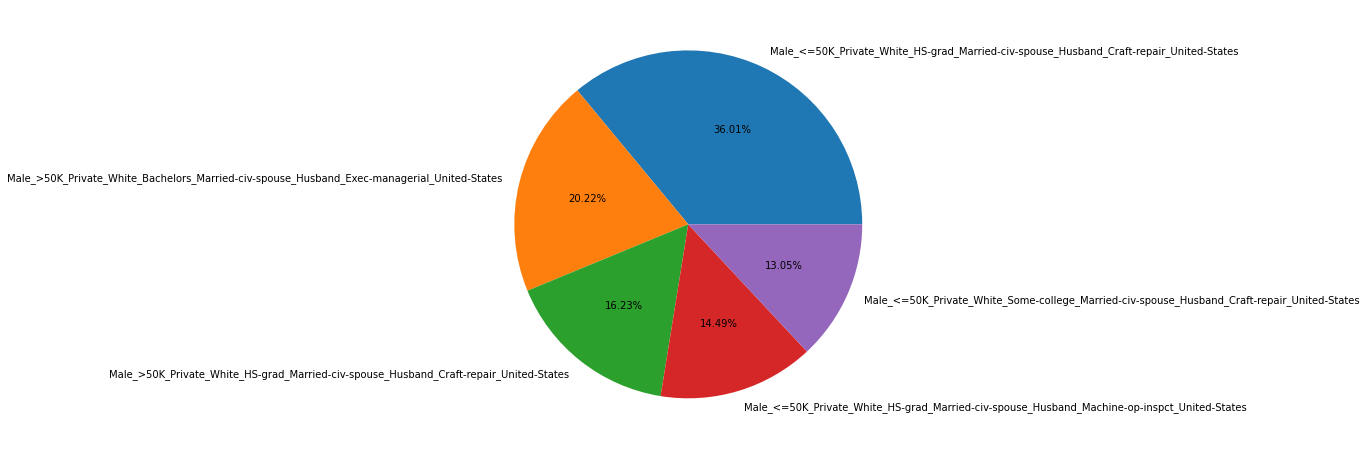

In [37]:
plt.figure(figsize=(10,8))
dfw=dfw.reset_index()
dfw=df.groupby(["gender","income","workclass","race","education","marital-status","relationship","occupation","native-country"])[["native-country"]].count()
dfw.rename(columns={"native-country":"nc_count"},inplace=True)
dfw.sort_values("nc_count",inplace=True,ascending=False)
dfw=dfw.reset_index()
dfw["labels"]=["_".join(i) for i in dfw[["gender","income","workclass","race","education","marital-status","relationship","occupation","native-country"]].values]
plt.pie(dfw["nc_count"].head(5),autopct="%.2f%%",labels=dfw["labels"].head(5))

<b>
SO WITH OUR CATEGORICAL ANALYSIS WE STATE THAT <BR>MOST OF THE ADULTS ARE MARRIED MALES AS CIVIL SPOUSE BELONGING TO WHITE RACE HAVING A EDUCATION OR DEGREE OF 
HS-GRAD WORKING IN THE FIELD OF 
CRAFTS AND REPAIR IN THE 
PRIVATE WORKCLASS COMING FROM THE COUNTRY OF 
UNITED STATES OF AMERICA
    AND BELONG TO <font color="red">36%</font> OF THE POPULATION</b> 

In [38]:
df["Numeric_analyser"]="BLANK"
df.loc[(df["gender"]=="Male") & (df["income"]=="<=50K"),"Numeric_analyser"]="Male_<=50K"
df.loc[(df["gender"]=="Male") & (df["income"]==">50K"),"Numeric_analyser"]="Male_>50K"
df.loc[(df["gender"]=="Female") & (df["income"]=="<=50K"),"Numeric_analyser"]="Female_<=50K"
df.loc[(df["gender"]=="Female") & (df["income"]==">50K"),"Numeric_analyser"]="Female_>50K"

Lets Now Check with histogram what is the frequency of different age ranges


In [39]:
import plotly.express as px


In [40]:
plt.figure(figsize=(20,6))
px.histogram(df,x="age",color="Numeric_analyser")

<Figure size 1440x432 with 0 Axes>

- From above we see that Most of the
    - Males lie in the age range of 28 to 45 
    - Females lie in age range of around 18 to 28
    - males with Income < 50K lie more between 20 and 30.
    - Females with Income >50K lie between 30 and 50.
- So we can assume That males who belong to white race working in private sector having HS grad as education married as civil spouse have age range between 28 to 45.

Lets Check the age wrt to Gender and Income.But First Lets Check if Age range 
again with box plot also which will give us precise idea.

In [41]:
plt.figure(figsize=(20,6))
px.box(df,x="age",color="Numeric_analyser")

<Figure size 1440x432 with 0 Axes>

- From the above Box plot,We See That Bt q1-q3 range
    - Males with income <50K lie in age range of 26-46
    - Males with income >50K lie in range of 37-51
    - Females with income <50K lie in age range 24-46
    - Females with income >50K lie in age range 35-49
- By Rule 18 is the starting age of being adult,Lower than that is not considered as an adult but lets check the people in age range of 18 first and then lets have a overall idea of age via median.

In [42]:
dfw=df.groupby(["gender","income","workclass","race","education","marital-status","relationship","occupation","native-country"])[["age"]].mean()
dfw.rename(columns={"age":"age_count"},inplace=True)
dfw.sort_values("age_count",inplace=True,ascending=False)
dfw=dfw.reset_index()
dfw[(dfw["gender"]=="Male") & (dfw["income"]=="<=50K") & (dfw["workclass"]=="Private") & (dfw["race"]=="White") & (dfw["education"]=="HS-grad") & (dfw["marital-status"]=="Married-civ-spouse") & (dfw["relationship"]=="Husband") & (dfw["occupation"]=="Craft-repair") & (dfw["native-country"]=="United-States")]

,gender,income,workclass,race,education,marital-status,relationship,occupation,native-country,age_count
4684,Male,<=50K,Private,White,HS-grad,Married-civ-spouse,Husband,Craft-repair,United-States,42.688912


So we observe that our guess and assumption was correct and the avg age is 42 and between 28 and 48.

<b>
SO WITH OUR CATEGORICAL ANALYSIS WE STATE THAT <BR>MOST OF THE ADULTS ARE MARRIED MALES AS CIVIL SPOUSE BELONGING TO WHITE RACE HAVING A EDUCATION OR DEGREE OF HS-GRAD WORKING IN THE FIELD OF CRAFTS AND REPAIR IN THE PRIVATE WORKCLASS COMING FROM THE COUNTRY OF UNITED STATES OF AMERICAAND BELONG TO % OF THE POPULATION AND ARE AROUND 42 YRS OLD AND FALL WITHIN YOUNG AND STRONG ADULTS CATEGORY(I.E BETWEEN 28 TO 48)
</b>

Lets Analyse For Age below 18

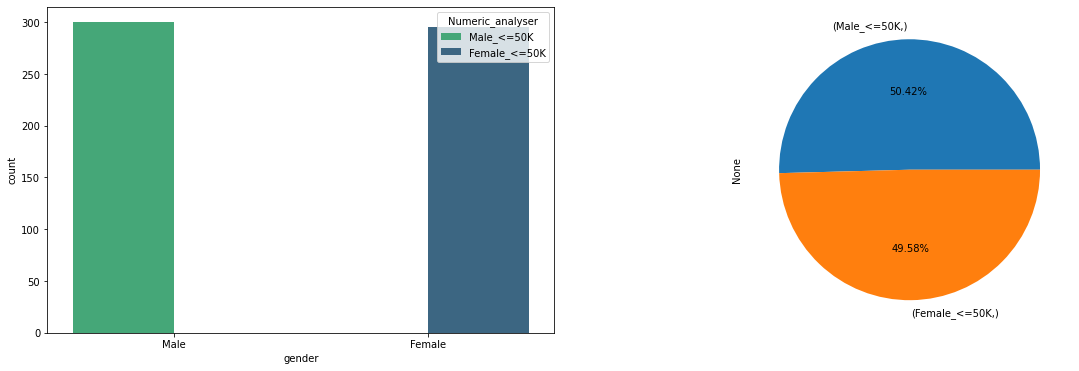

In [43]:
plt.figure(figsize=(20,6))
plt.subplot(121)
ax=sns.countplot(x="gender",data=df[df["age"]<18],palette="viridis_r",hue="Numeric_analyser")
plt.subplot(122)
df[df["age"]<18][["Numeric_analyser"]].value_counts().plot(kind="pie",autopct="%.2f%%")

Lets Check the Workclass first to see whether or not people below 18 work or not?

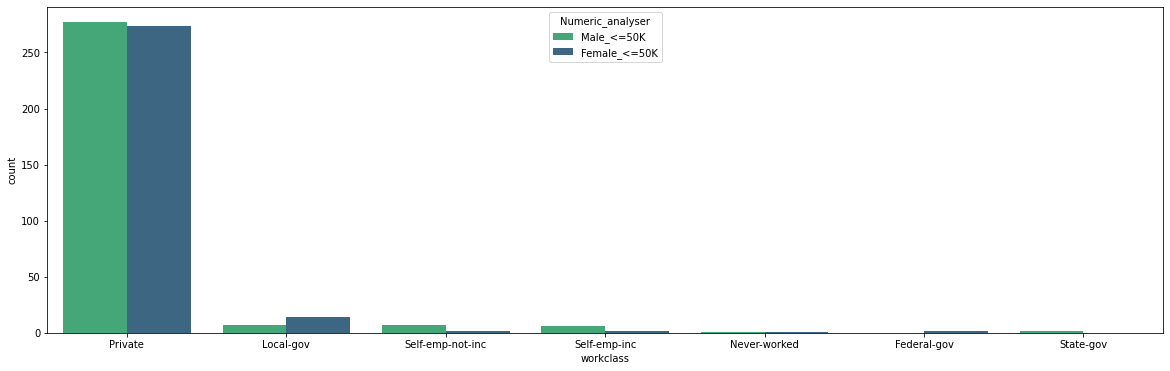

In [44]:
plt.figure(figsize=(20,6))
ax=sns.countplot(x="workclass",data=df[df["age"]<18],palette="viridis_r",hue="Numeric_analyser")

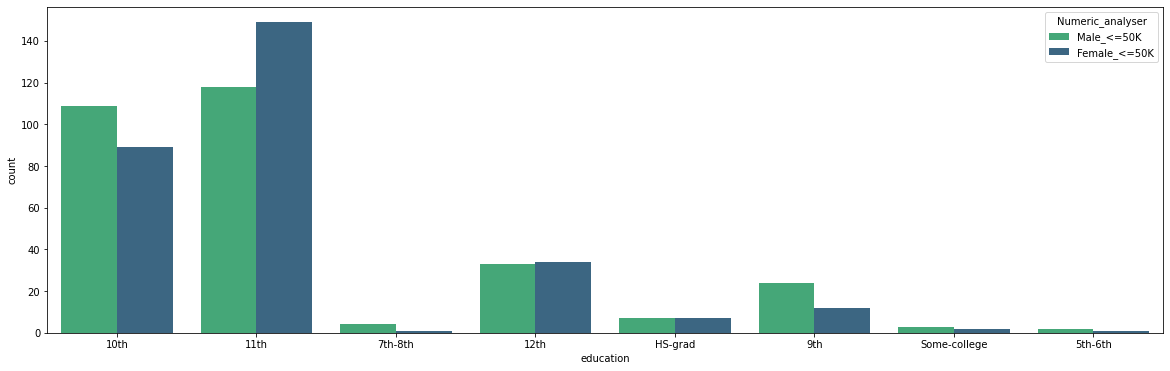

In [45]:
plt.figure(figsize=(20,6))
ax=sns.countplot(x='education',data=df[df["age"]<18],palette="viridis_r",hue="Numeric_analyser")

- From aboove we observe that Most of the People have completedd thier education till 11th std and Females have high frequency here.
- To Look Over males,They have completed their education till 9th and 10th Std with 10th std Males having higher frequency.
- Since Females are More we assume that Females from Private workclass are more

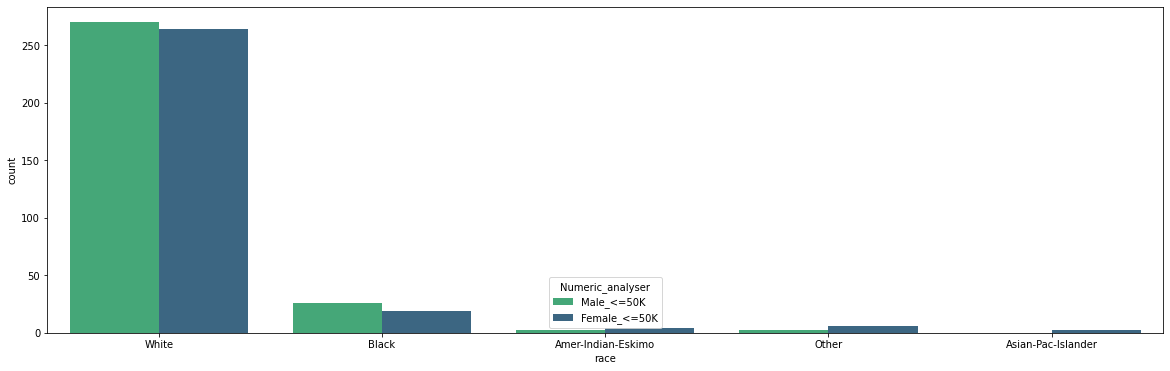

In [46]:
plt.figure(figsize=(20,6))
ax=sns.countplot(x='race',data=df[df["age"]<18],palette="viridis_r",hue="Numeric_analyser")


- There are almost equal number of Males and females belonging to white Race.
- We assume that Males or Females with private and education as 11th std will be high in frequency,to be precise Males might be higher and females will be equal

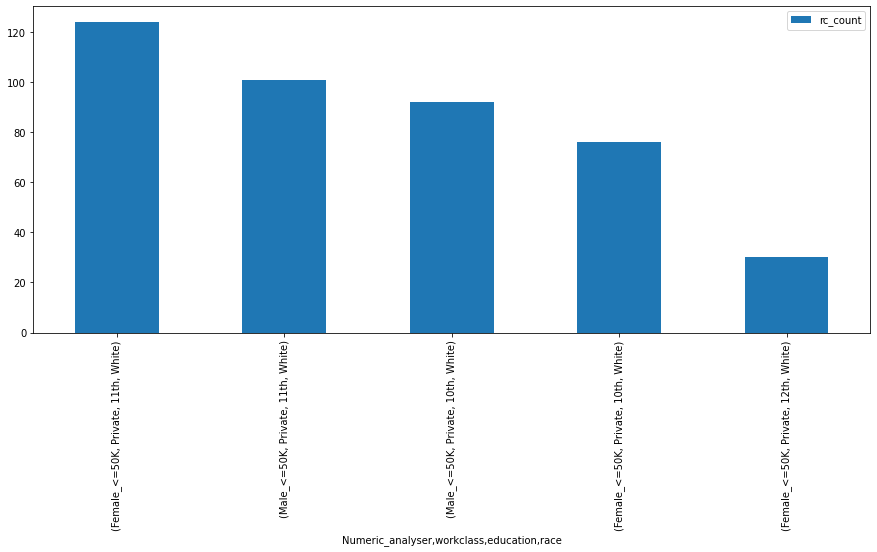

In [47]:
dfw=df[df["age"]<18].groupby(["Numeric_analyser","workclass","education","race"])[["race"]].count()
dfw.rename(columns={"race":"rc_count"},inplace=True)
dfw.sort_values("rc_count",inplace=True,ascending=False)
dfw.head(5).plot(kind="bar",figsize=(15,6))

<B>THE REASON FOR FEMALES HERE BEING HIGH IS IN 11TH STD FEMALES ARE HIGH AND SO DOES WITH FILTER OF RACE AND EDUCATION COMBINED,FEMALES ABOOVE ARE HIGHER BUT OUT ASSUMPTION IS SECOND HIGHEST

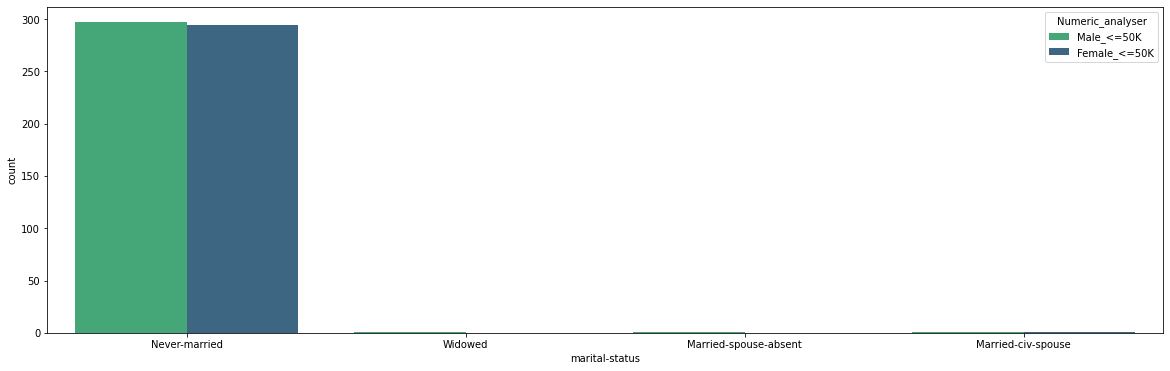

In [48]:
plt.figure(figsize=(20,6))

ax=sns.countplot(x="marital-status",data=df[df["age"]<18],palette="viridis_r",hue="Numeric_analyser")

- Its Quite Obvious that we are analysing age less tha 18 so maximum people wont be married but there are some and since they are from USA(from analysis from all datapoints done before this aboove at start) anything can happen there and They seem to be different cases.But Looking here we observe that females and males are nearly equal in count
- As per aboove we assume that since 11th std has females high so here with marital status also we assume females from private 11th std completed from white race are high.

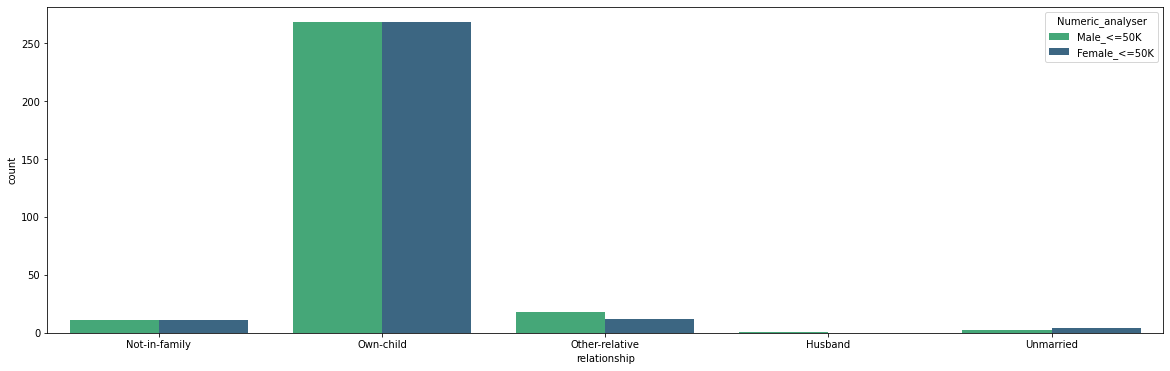

In [49]:
plt.figure(figsize=(20,6))
ax=sns.countplot(x="relationship",data=df[df["age"]<18],palette="viridis_r",hue="Numeric_analyser")

- Most of The Males and females have equal count as usual and have own child of thier family as most of the males and females aint married,it looks like Females tend to live as single mothers and so does males as single fathers andd Since its USA anything can happen and not surprising too
- We Assume Females are the one child who have completed 11th std belonging from white race working in private sector with income<50K

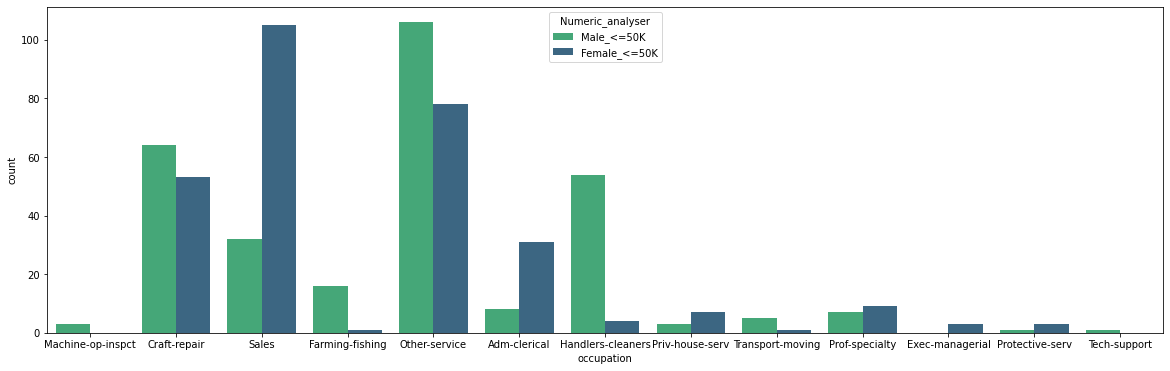

In [50]:
plt.figure(figsize=(20,6))

ax=sns.countplot(x="occupation",data=df[df["age"]<18],palette="viridis_r",hue="Numeric_analyser")

- From Aboove we see that Females in Sales and Males In Other Services have nearly equal count.
- Since we have assumed that females are more with 11th std edu and even more than males we assume That 
    - Females with Sales Belonging to white race working in Sales belonging to private sector having own child but never married are more
    - Males With Other Services Belonging to white race working in Sales belonging to private sector having own child but never married are more
    - Or It Could be Vice Versa

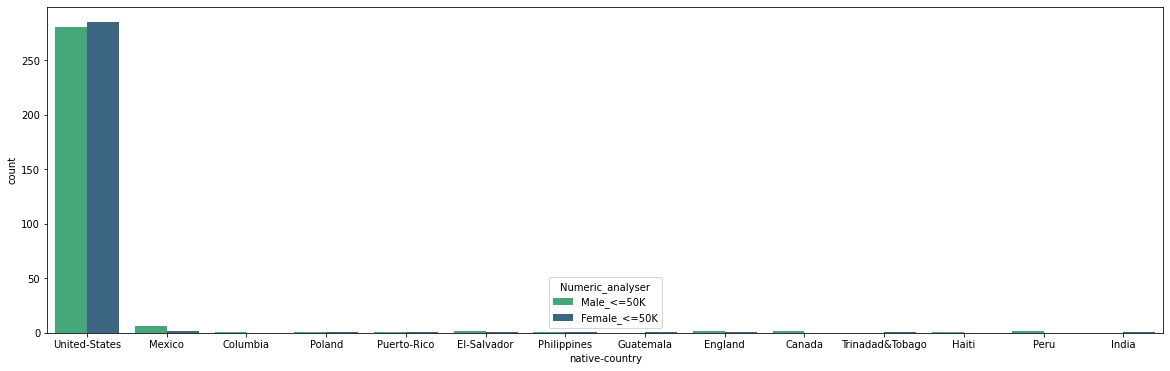

In [51]:
plt.figure(figsize=(20,6))

ax=sns.countplot(x="native-country",data=df[df["age"]<18],palette="viridis_r",hue="Numeric_analyser")


As We See Most of Them are From USA and Straight conclude that Females with white race own child never married in sales are More.

([<matplotlib.patches.Wedge at 0x7f885bd50b10>,
 [Text(0.6650590580684889, 0.8761828857499183, 'Female_<=50K_Private_White_11th_Never-married_Own-child_Sales_United-States'),
  Text(-0.8761828546162559, 0.6650590990855693, 'Male_<=50K_Private_White_10th_Never-married_Own-child_Other-service_United-States'),
  Text(-0.9287607599924328, -0.5894094083896854, 'Male_<=50K_Private_White_11th_Never-married_Own-child_Handlers-cleaners_United-States'),
  Text(0.09204559140357094, -1.0961421482194573, 'Female_<=50K_Private_White_10th_Never-married_Own-child_Other-service_United-States'),
  Text(0.9748239327009739, -0.5096256471503445, 'Male_<=50K_Private_White_11th_Never-married_Own-child_Other-service_United-States')],
 [Text(0.3627594862191757, 0.4779179376817736, '29.33%'),
  Text(-0.4779179206997759, 0.3627595085921287, '20.67%'),
  Text(-0.5065967781776906, -0.3214960409398283, '18.00%'),
  Text(0.0502066862201296, -0.5978957172106131, '16.67%'),
  Text(0.531722145109622, -0.277977625718369

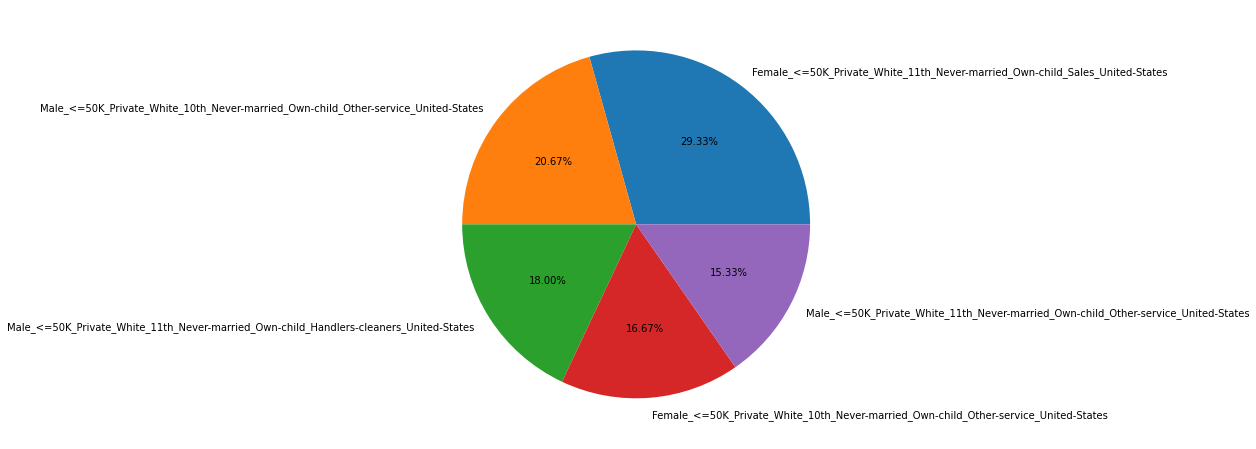

In [52]:
plt.figure(figsize=(10,8))
dfw=df[df["age"]<18].groupby(["gender","income","workclass","race","education","marital-status","relationship","occupation","native-country"])[["native-country"]].count()
dfw.rename(columns={"native-country":"nc_count"},inplace=True)
dfw.sort_values("nc_count",inplace=True,ascending=False)
dfw=dfw.reset_index()
dfw["labels"]=["_".join(i) for i in dfw[["gender","income","workclass","race","education","marital-status","relationship","occupation","native-country"]].values]
plt.pie(dfw["nc_count"].head(5),autopct="%.2f%%",labels=dfw["labels"].head(5))

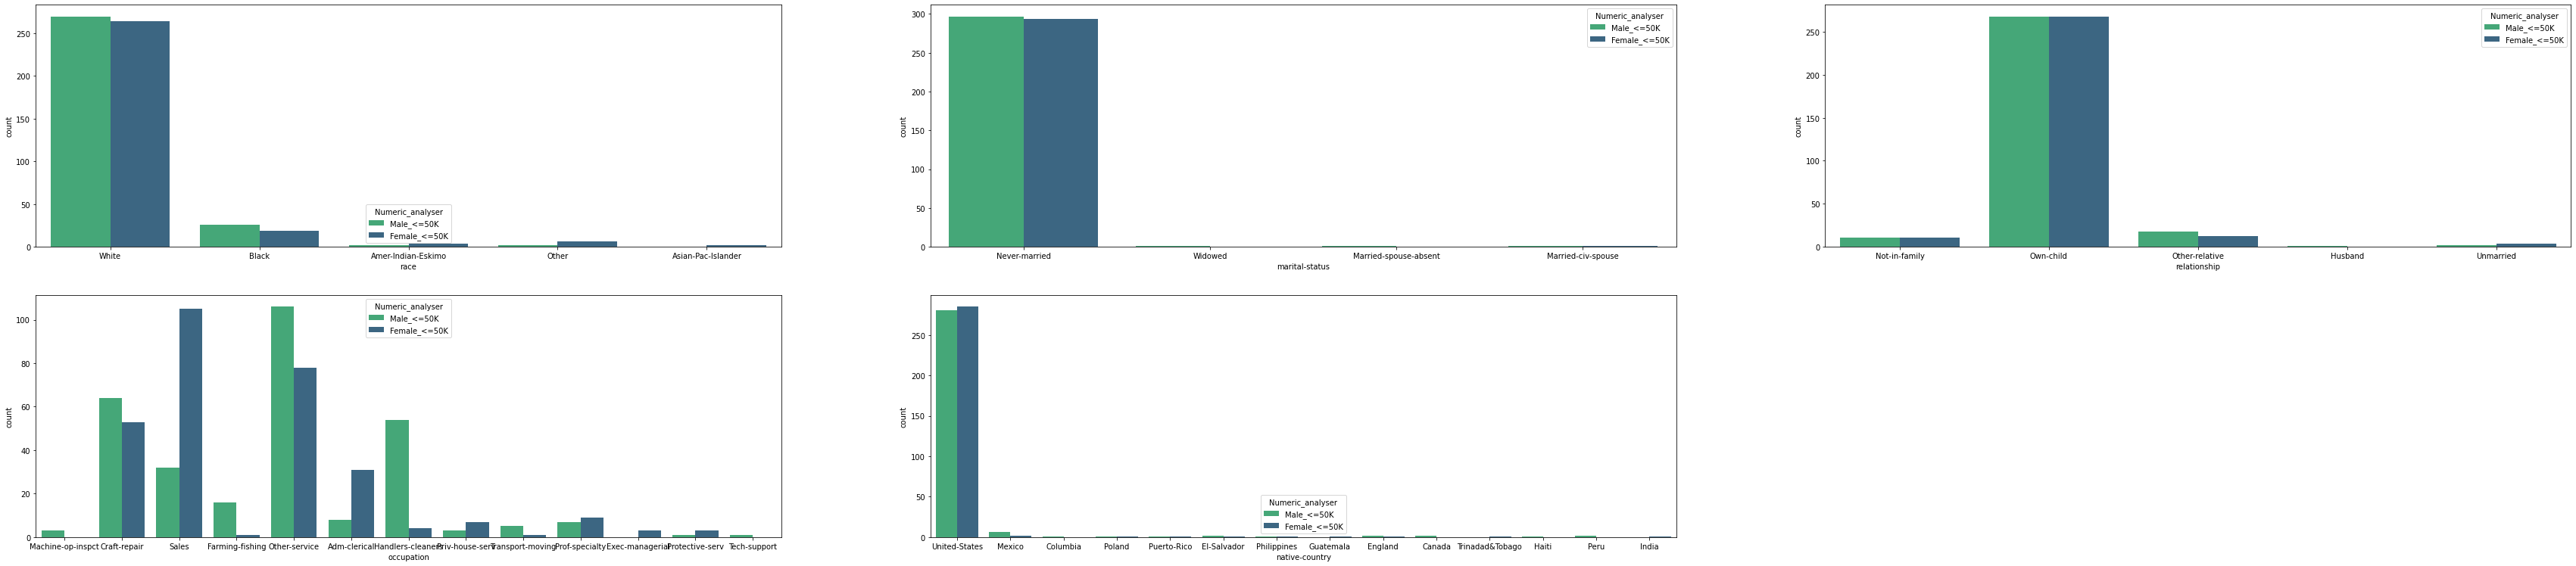

In [53]:
k=1
plt.figure(figsize=(60,20))
for i in ["race","marital-status","relationship","occupation","native-country"]:
    plt.subplot(eval("33"+str(k)))
    ax=sns.countplot(x=i,data=df[df["age"]<18],palette="viridis_r",hue="Numeric_analyser")
    k=k+1

- So now we are done with the Numerical analysis using Categorical hue refernce and we know that the aboove category belong below 18,But below 18 also lets check what the mean age wrt gender and income.
- As we wanna see below what the age they start working or tend to start working as i know not many are there who work and some have not worked.
- Just out of curiousity lets also see Those who never worked whats thier age,is it below 18 or aboove or whatever.

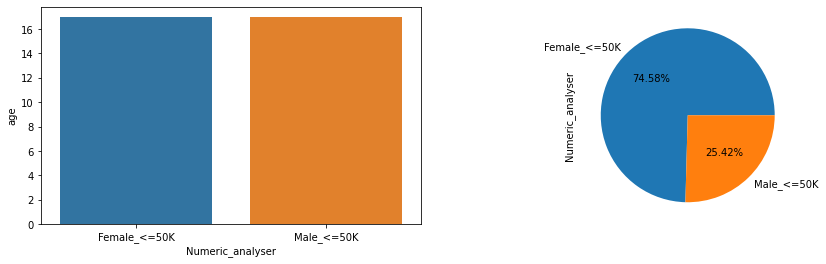

In [54]:
plt.figure(figsize=(15,4))
plt.subplot(121)
ax=sns.barplot(x="Numeric_analyser",y="age",data=df[(df["age"]<18) & (df["workclass"]=="Private") & (df["occupation"]=="Sales") & (df["marital-status"]=="Never-married") & (df["relationship"]=="Own-child") & (df["race"]=="White") & (df["education"]=="11th") & (df["native-country"]=="United-States")],estimator=np.median)
plt.subplot(122)
df[(df["age"]<18) & (df["workclass"]=="Private") & (df["occupation"]=="Sales") & (df["marital-status"]=="Never-married") & (df["relationship"]=="Own-child") & (df["race"]=="White") & (df["education"]=="11th") & (df["native-country"]=="United-States")]["Numeric_analyser"].value_counts().plot(kind="pie",autopct="%.2f%%")

From aboove we infer that Below 18,Only 17 yrs old start working due to some reasons and majority of them with around 75 % are Females

Since we now know Males and females do work and Females are More with aboove mentioned with green mixed text.Lets See What are the working Hours Of Those Females as well as Males because both are somewhat equal

Lets Check The Age range Of people by excluding people below 18 and people of age aboove 65. i.e Young People.

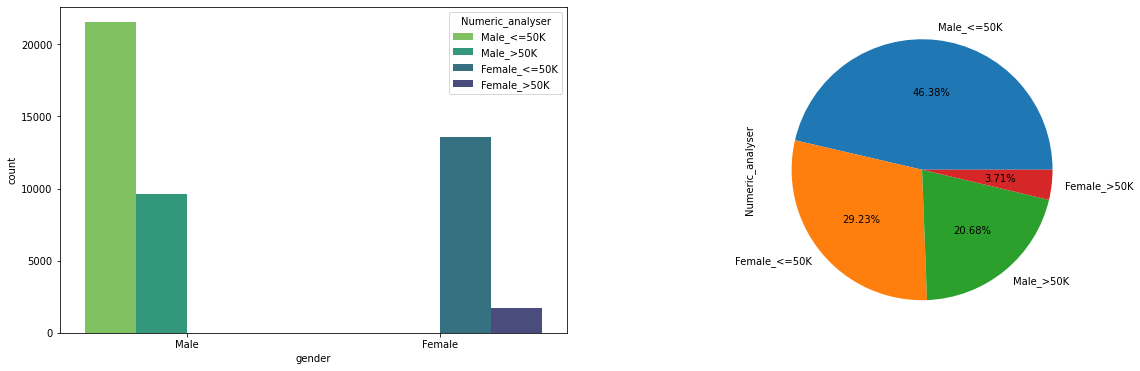

In [55]:
plt.figure(figsize=(20,6))
plt.subplot(121)
ax=sns.countplot(x="gender",data=df[(df["age"]>=18) & (df["age"]<=65)],palette="viridis_r",hue="Numeric_analyser")
plt.subplot(122)
df[(df["age"]>=18) & (df["age"]<=65)]["Numeric_analyser"].value_counts().plot(kind="pie",autopct="%.2f%%")

We Observe that in age range of 18 to 65, There are 46.38% of Males With Income <50K have High frequency. In aboove We Plot we saw One by one plot and extracted features. Here we will plot all the graphs at once and extract insights.

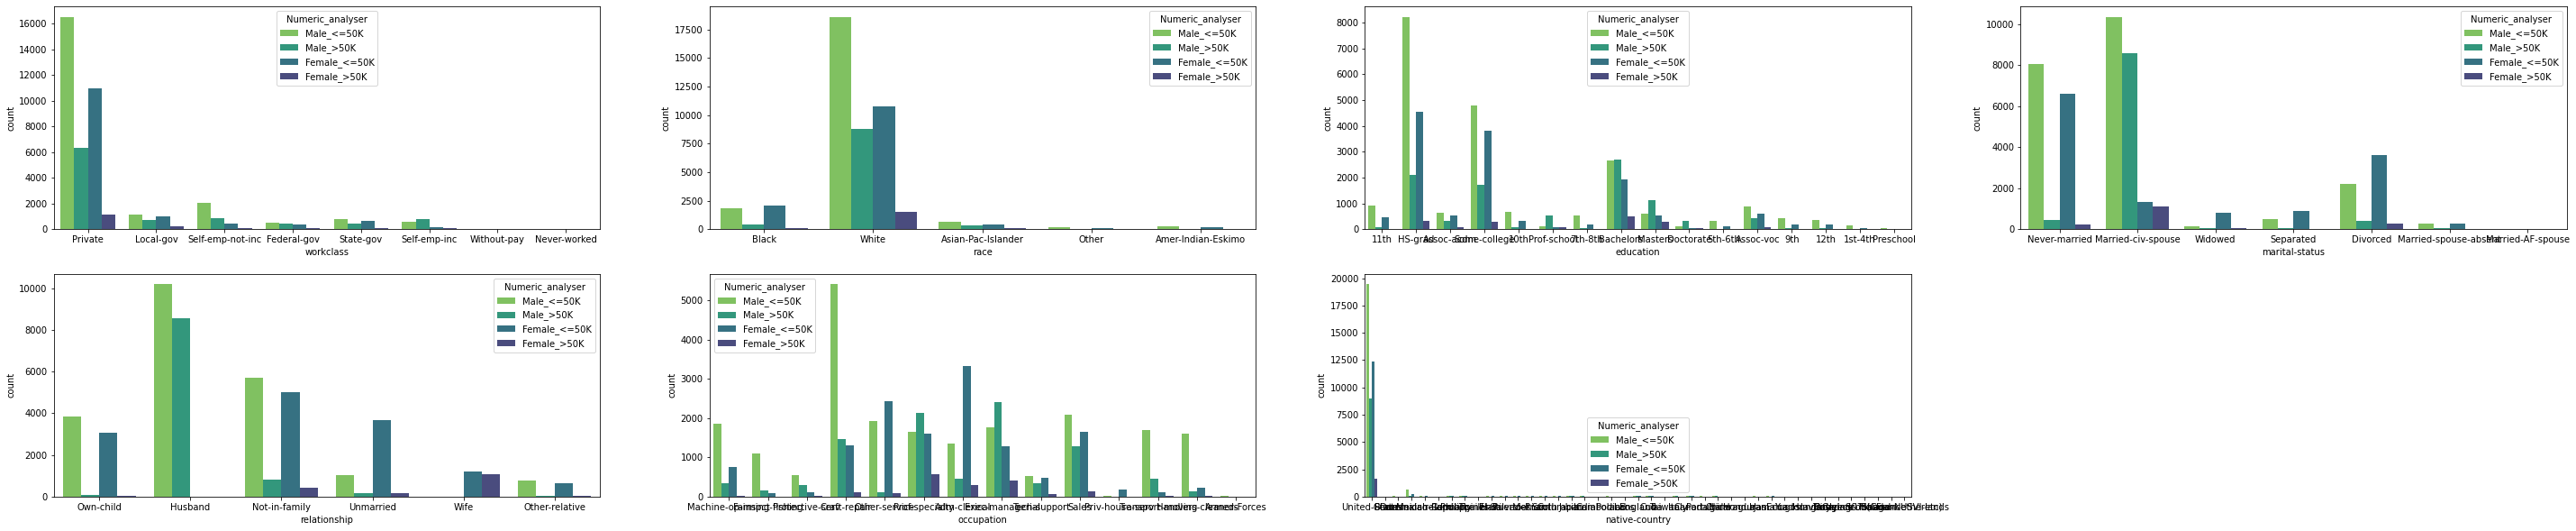

In [56]:
plt.figure(figsize=(50,10))
k=1
for i in ["workclass","race","education","marital-status","relationship","occupation","native-country"]:
    plt.subplot(int("24"+str(k)))
    ax=sns.countplot(x=i,data=df[(df["age"]>=18) & (df["age"]<=65)],palette="viridis_r",hue="Numeric_analyser")
    k=k+1

- From Aboove we observe and Assume that Males With Income <50K Belonging to White race Working in Private Class as Crafts-Repairer with Education as High School Grad And Are Civi Spouse From United States Of Country are Top.
- This Is Obvious As We Saw That avg Age Of This Category is around 42 which we have seen before and 42 lies between 18-65,So Its Obvious and quite Understandable.
- Lets Compare

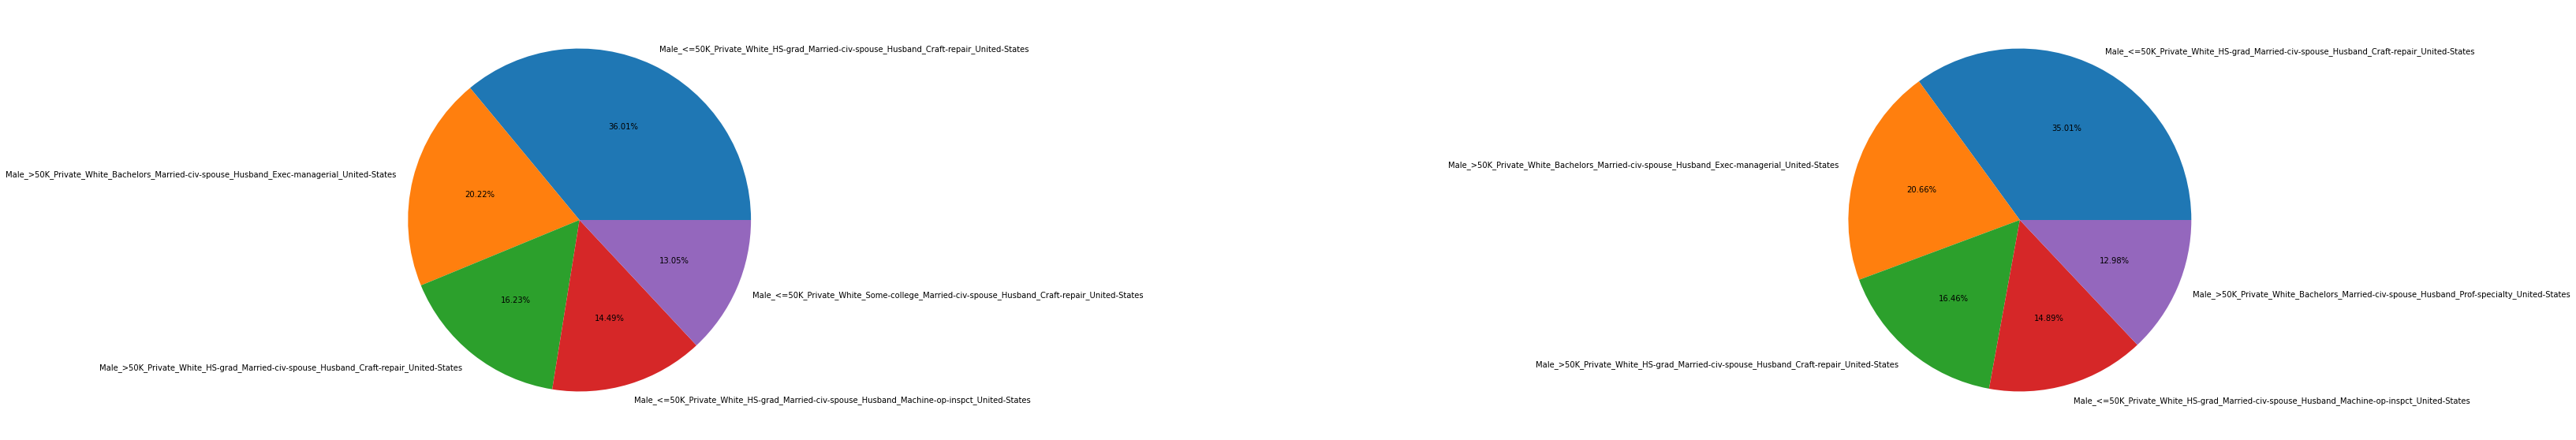

In [57]:
plt.figure(figsize=(60,10))
plt.subplot(121)
dfw=df.groupby(["gender","income","workclass","race","education","marital-status","relationship","occupation","native-country"])[["native-country"]].count()
dfw.rename(columns={"native-country":"nc_count"},inplace=True)
dfw.sort_values("nc_count",inplace=True,ascending=False)
dfw=dfw.reset_index()
dfw["labels"]=["_".join(i) for i in dfw[["gender","income","workclass","race","education","marital-status","relationship","occupation","native-country"]].values]
plt.pie(dfw["nc_count"].head(5),autopct="%.2f%%",labels=dfw["labels"].head(5))


plt.subplot(122)
dfw=df[(df["age"]>=18) & (df["age"]<=65)].groupby(["gender","income","workclass","race","education","marital-status","relationship","occupation","native-country"])[["native-country"]].count()
dfw.rename(columns={"native-country":"nc_count"},inplace=True)
dfw.sort_values("nc_count",inplace=True,ascending=False)
dfw=dfw.reset_index()
dfw["labels"]=["_".join(i) for i in dfw[["gender","income","workclass","race","education","marital-status","relationship","occupation","native-country"]].values]
plt.pie(dfw["nc_count"].head(5),autopct="%.2f%%",labels=dfw["labels"].head(5))

plt.show()

- After Comparing We See that Compared To Pie of all the datapoint vs datapoints with age in range of 18-65 are overall same but looking over the difference of decimals,a litlle bit only
    - For First the difference is 1 i.e 36.01-35.01
    - For 2,3 and 4 the difference is between 0.1 and 0.5
    - For Last One There is a difference of 0.7 i.e 13.05-12.98
    - But The aboove differences are very very little and may or may not matter depending on use case but generally we ignore them and look overall differnces.
- But The Overall Conclusion is our assumption for This age range was correct and Both Graphs have no differnce if we round Off, And That May be Because 95% of data lies in This range so the little difference might be unknown changes in count and sum with people of age <18 and age>65(Which we will see Next after This analysis)



We Know that we are looking at age 18-65 but lets also see whats the precise age of males between 18-65 range and also the age of Males <50K income from private belong to white race and married as civ spouse from USA.

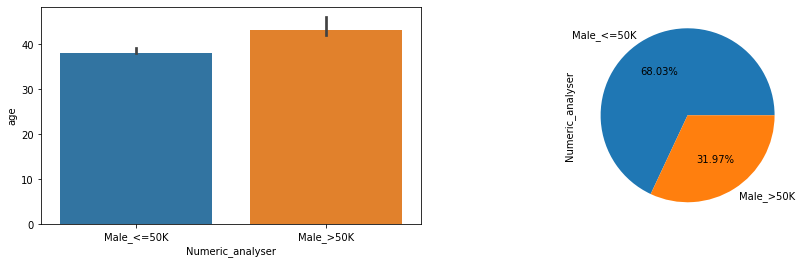

In [58]:
plt.figure(figsize=(15,4))
plt.subplot(121)
ax=sns.barplot(x="Numeric_analyser",y="age",data=df[((df["age"]>=18) & (df["age"]<=65)) & (df["workclass"]=="Private") & (df["occupation"]=="Craft-repair") & (df["marital-status"]=="Married-civ-spouse") & (df["relationship"]=="Husband") & (df["race"]=="White") & (df["education"]=="HS-grad") & (df["native-country"]=="United-States")],estimator=np.median)
plt.subplot(122)
df[((df["age"]>=18) & (df["age"]<=65)) & (df["workclass"]=="Private") & (df["occupation"]=="Craft-repair") & (df["marital-status"]=="Married-civ-spouse") & (df["relationship"]=="Husband") & (df["race"]=="White") & (df["education"]=="HS-grad") & (df["native-country"]=="United-States")]["Numeric_analyser"].value_counts().plot(kind="pie",autopct="%.2f%%")

We observe there are only males in age between 18-65 and now we observe that there are 68.03% of Males who are avg 38 yrs of age and rest have income aboove >50K and have age of avg 43 yrs.

*Lets* See Working Hours and Educatin period wrt gender and income for age between 18 and 65

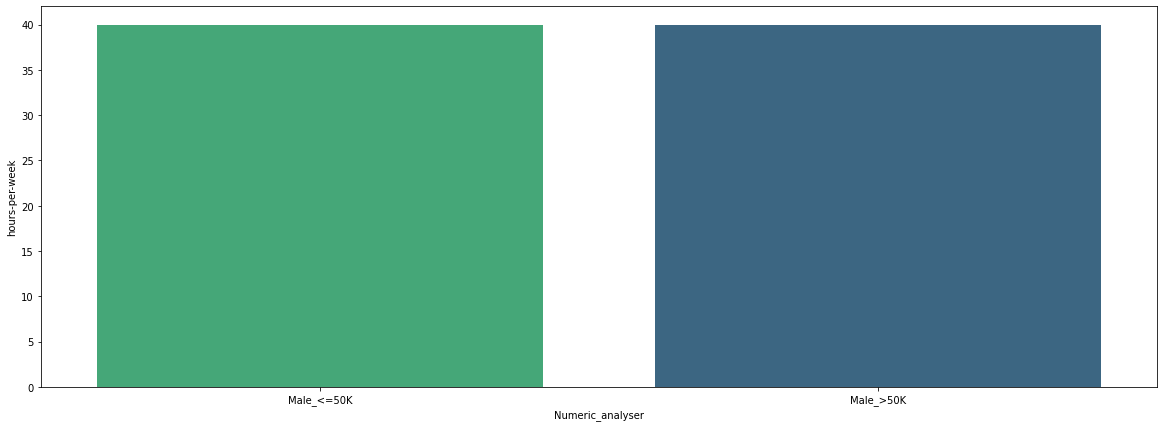

In [59]:
d=df[((df["age"]>=18) & (df["age"]<=65)) & (df["workclass"]=="Private") & (df["occupation"]=="Craft-repair") & (df["marital-status"]=="Married-civ-spouse") & (df["relationship"]=="Husband") & (df["race"]=="White") & (df["education"]=="HS-grad") & (df["native-country"]=="United-States")]
plt.figure(figsize=(20,7))
ax=sns.barplot(x="Numeric_analyser",y="hours-per-week",data=d,palette="viridis_r",estimator=np.median)



Lets Look at Hours Per Week wrt workclass and Occupation for age between 18 and 65

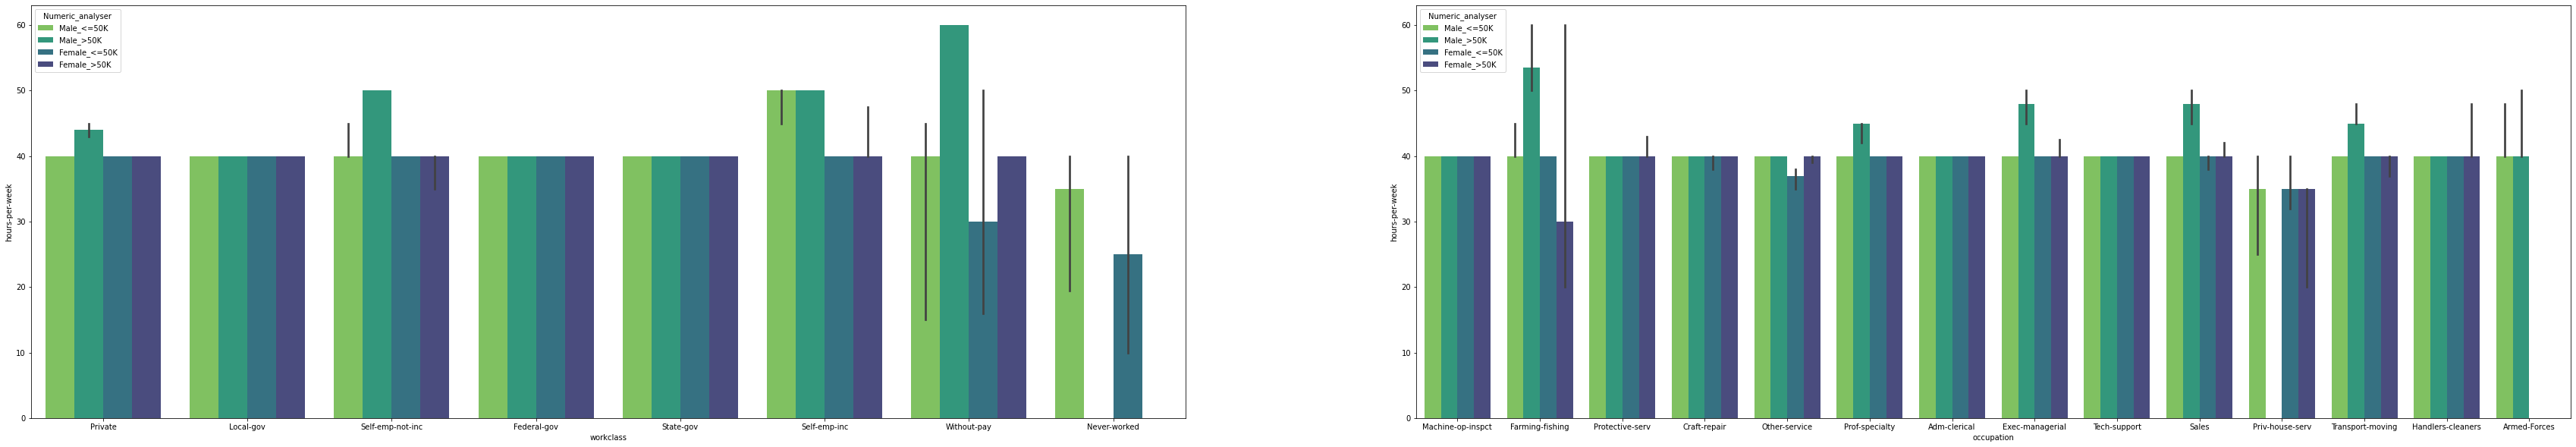

In [60]:
plt.figure(figsize=(60,10))
plt.subplot(121)
ax=sns.barplot(x="workclass",y="hours-per-week",data=df[((df["age"]>=18) & (df["age"]<=65))],estimator=np.median,hue="Numeric_analyser",palette="viridis_r")
plt.subplot(122)
ax=sns.barplot(x="occupation",y="hours-per-week",data=df[((df["age"]>=18) & (df["age"]<=65))],estimator=np.median,hue="Numeric_analyser",palette="viridis_r")


)Lets Look at Hours Per Week wrt workclass and Occupation for age > 65

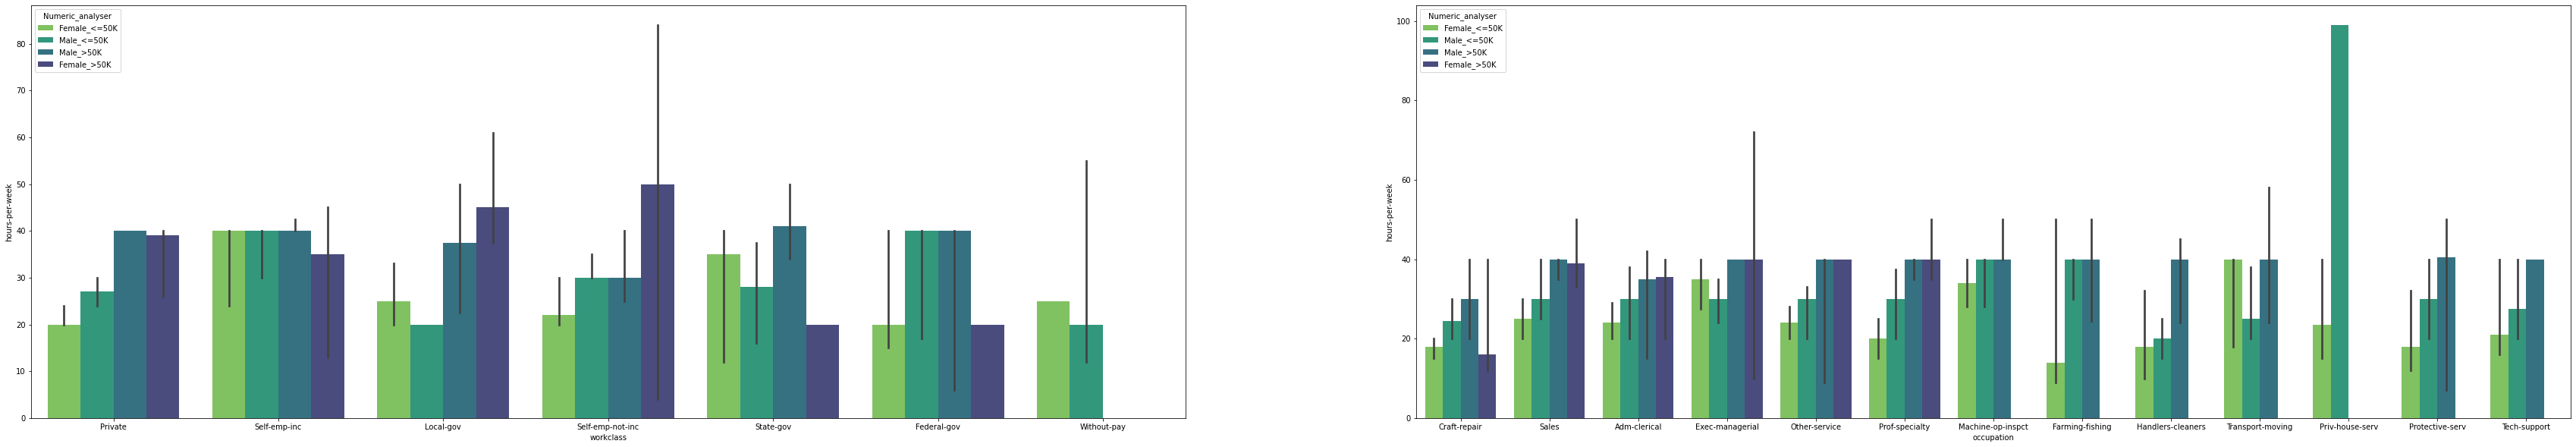

In [61]:
plt.figure(figsize=(60,10))
plt.subplot(121)
ax=sns.barplot(x="workclass",y="hours-per-week",data=df[(df["age"]>65)],estimator=np.median,hue="Numeric_analyser",palette="viridis_r")
plt.subplot(122)
ax=sns.barplot(x="occupation",y="hours-per-week",data=df[(df["age"]>65)],estimator=np.median,hue="Numeric_analyser",palette="viridis_r")


<b>FINAL EDA CONCLUSION
- SO WE SAW THAT
    - <U><I>36%</I></U> OF MARRIED MALES AS CIVIL SPOUSE BELONGING TO WHITE RACE HAVING A EDUCATION OR DEGREE OF HS-GRAD WORKING IN THE FIELD OF CRAFTS AND REPAIR IN THE IN PRIVATE WORKCLASS COME FROM THE COUNTRY OF UNITED STATES OF AMERICA ARE 18 AND ABOOVE.
    - <U><I>29.33%</I></U> ARE FEMALES WITH WORKCLASS AS PRIVATE WORKING IN SALES HAVING OWN CHILD ONLY BUT NEVER MARRIED AND FROM USA AND ARE BELOW 18.
   

Now Lets Check the overall age range

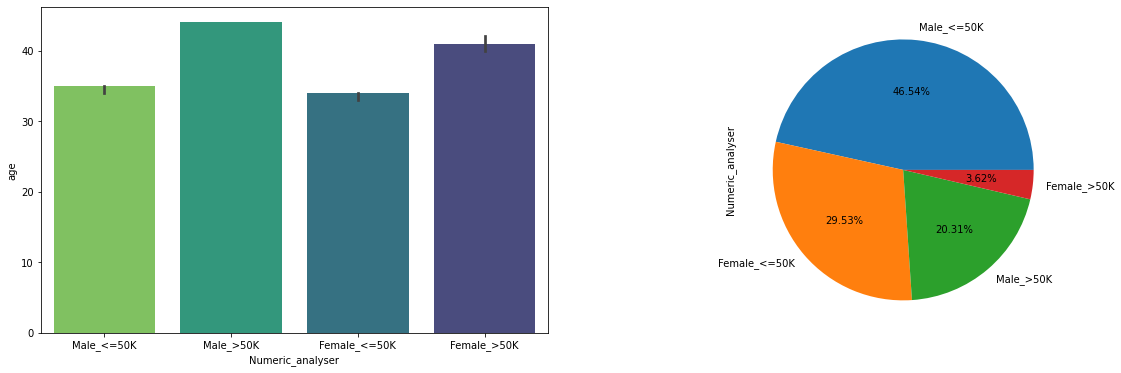

In [62]:
plt.figure(figsize=(20,6))
plt.subplot(121)
ax=sns.barplot(x="Numeric_analyser",y="age",data=df,palette="viridis_r",estimator=np.median)
plt.subplot(122)
df["Numeric_analyser"].value_counts().plot(kind="pie",autopct="%.2f%%")

We Observe that
- 46.54 % Males with income<50K have avg age of 35 and with income >50,20.31 % Males exceeds age 40 and has avg age od 44
- 29.53 % Females with income<50 have avg age of 34 and are near to men with income <50K and For Income >50K too 3.62 % of females are somewhat near to males aboove 40 and with avg age 41.


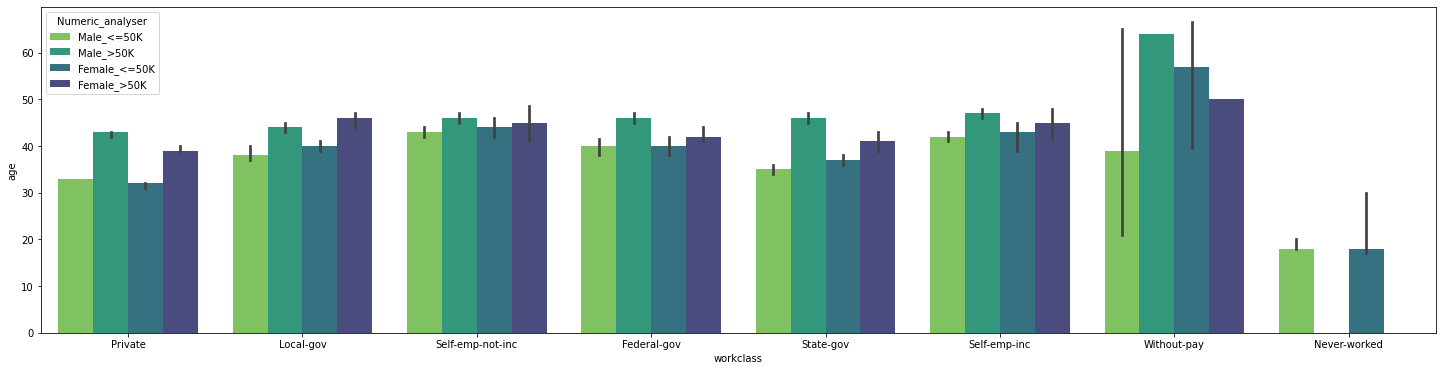

In [63]:
plt.figure(figsize=(25,6))
sns.barplot(x="workclass",y="age",data=df,palette="viridis_r",estimator=np.median,hue="Numeric_analyser")

- So After Merging The work seems Little Easy and Now we can infer more precisely that Males with Income >50K have more Age compared to other sectors.
- If We Look at Gov Sectors There also Mostly males are max with they seem be in age of range 40 to 50. And we also see that Income is aboove 50 if the age is aboove or near 40 for Males.

So now we are done with numerical and categorical analysis, Lets Now Go ahead to check if relationships between numerical columns

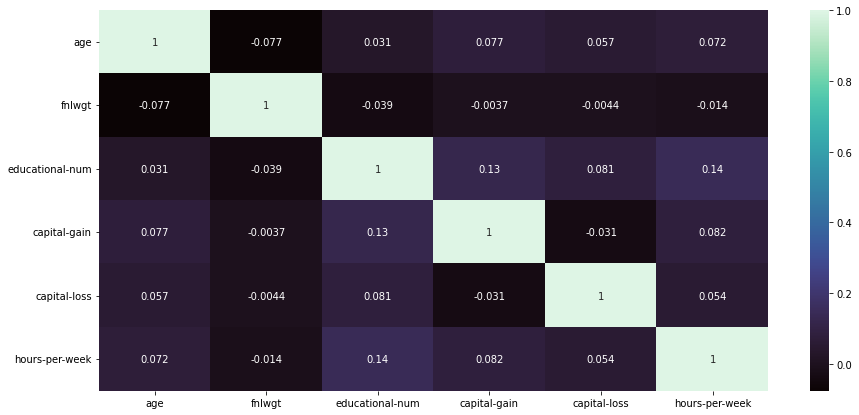

In [64]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap="mako")

With the heatmap we understand that, There is weak relation between numerical columns.Lets See with pairplot also 

<Figure size 720x576 with 0 Axes>

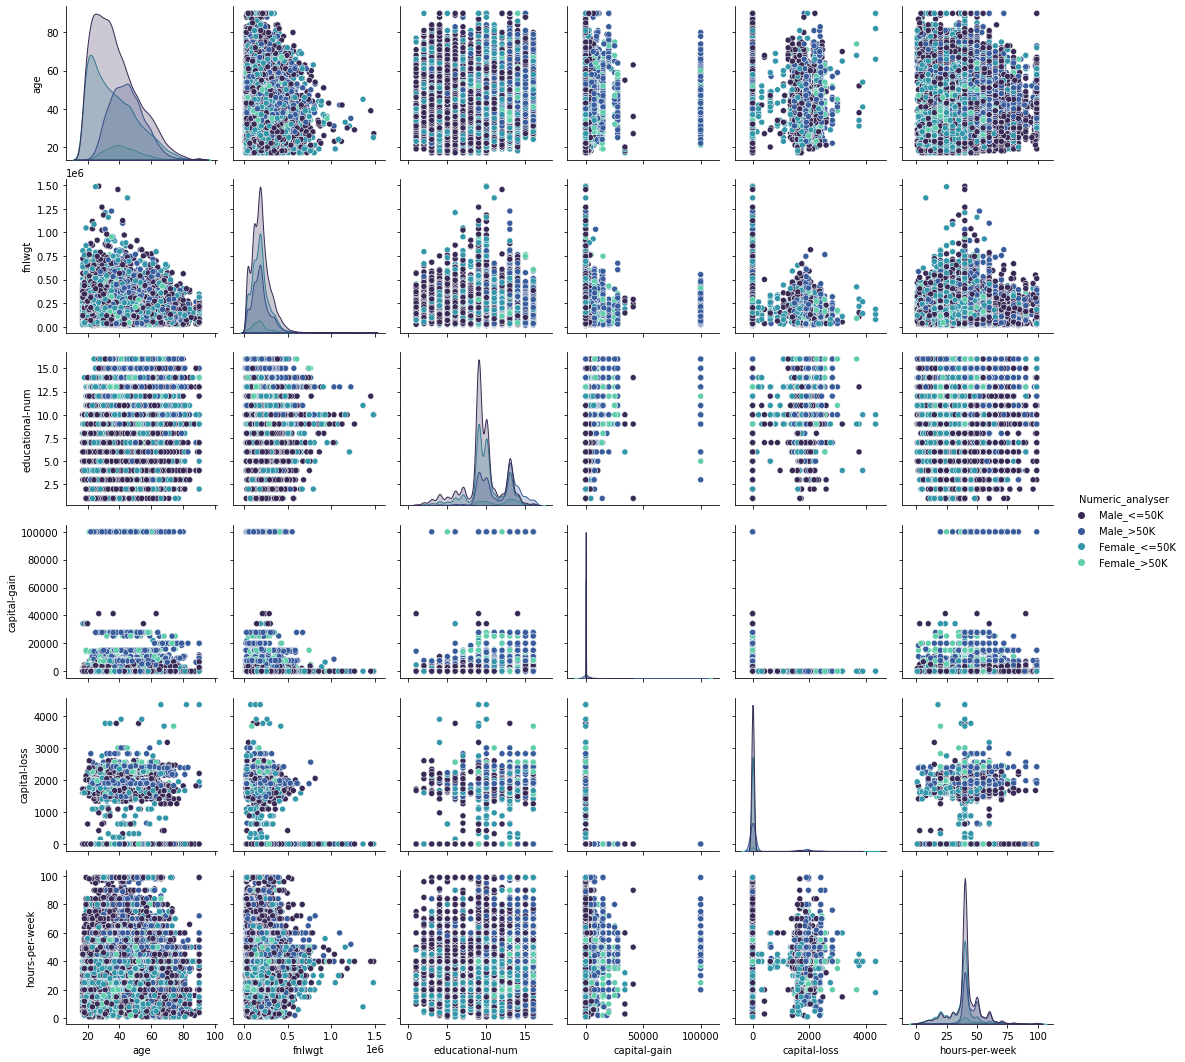

In [65]:
plt.figure(figsize=(10,8))
sns.pairplot(df,hue="Numeric_analyser",palette="mako")

- Now That we have seen relationship with correlation,we are sure that the columns have no relationship and this should be true via statistical tests when we perform pearsonr correlation test.
- Lets Test For
    - Age vs Educational No of years
    - Age Vs Working hours
    - Eductational Num of years vs work hours

- Our Hypothesis
    - $H_O$(Null Hypothesis)=There is No Relation Between columns.
    - $H_1$(Alternate Hypothesis)=There is relation between columns.

In [66]:
from scipy.stats import spearmanr as sr,chi2_contingency
np.random.seed(1)
corrtestSample=df.sample(1000)
for i in ["educational-num","hours-per-week"]:
    test_1=sr(corrtestSample["age"],corrtestSample[i])
    if test_1[1]<0.05:
        print("There is correlation between the columns")
    else:
        print("No Correlation Between columns")
test_2=sr(corrtestSample["educational-num"],corrtestSample["hours-per-week"])
if test_2[1]<0.05:
    print("There is correlation between columns")
else:
    print("There is no correlation between columns")
print(test_1,test_2)

No Correlation Between columns
No Correlation Between columns
There is correlation between columns
SpearmanrResult(correlation=0.059726147386104274, pvalue=0.05902192028613973) SpearmanrResult(correlation=0.152170182853328, pvalue=1.3367955682210632e-06)


From aboove Test we see that There is no correlation between Age and educational-num-of-years and hours-per-week,But pvalue for working hours and educational num of years is low which says there is correlation.Lets see.

In [67]:
df[["educational-num","hours-per-week"]].corr()

,educational-num,hours-per-week
educational-num,1.000000,0.143689
hours-per-week,0.143689,1.000000


- From aboove we observe that There is correlation but its weak correlation which doesnt matter to us in this case.
- So we have compared relevant columns like Age,hours-per-week,educational no of years as Hours-per-week may depend on the age factor or hours per-week may depend on educational period and also somewhat there could be relation between age and edu num of years like more age more education period lol. But Here in this case there is no relation.
- Lets Proceed with categorical analysis and Check if there is any relation between categorical colums using chi sq test
- Our Hypothesis
    - $H_O$(Null Hypothesis)=There is No Relation Between columns.
    - $H_1$(Alternate Hypothesis)=There is relation between columns.

In [68]:
for i in ['workclass', 'education', 'marital-status', 'occupation','relationship', 'race', 'native-country',"gender"]:
    chicrosstab=pd.crosstab(corrtestSample["income"],corrtestSample[i])
    chitest=chi2_contingency(chicrosstab)
    if chitest[1]<0.05:
        print("There is Relation between Income and {}".format(i))

There is Relation between Income and workclass
There is Relation between Income and education
There is Relation between Income and marital-status
There is Relation between Income and occupation
There is Relation between Income and relationship
There is Relation between Income and race
There is Relation between Income and gender


From aboove we see that Education,Marital status,occupation,relationship and gender matter for income. We can understand that
- Education
- Occupation

These aboove factors do impact what a income should be i.e less or more and whatever but
- Marital-status
- relationship
- gender
- Race

Also impact income and from here we cannot surely state the reason.Maybe that Marital-status is being high profile then income maybe more,For Gender there might be males and females given perferances for income and same applies for race,relationship as i said gender impacts then maybe husband or wife may be earning more but we cant state this for sure and would need a complete sepearte analysis.


Lets Now Test A Hypothesis relted to Working Hours using ttest<br>
<i><font size=3 style="font-family:papyrus;">According to WHO(World Health Organization) To Keep Ourself fit and Fine and Be healthy,We should be working 7.5 Hrs On average.So Lets Test Whether The Avg working hours are 7.5 or Not.</font></i>

- Our Hypothesis
    - $H_O$(Null Hypothesis)$\Rightarrow\mu=56$
    - $H_1$(Alternate Hypothesis)$\Rightarrow\mu\neq56$

In [69]:
np.random.seed(1)
WorkHours=df.groupby("gender").sample(1000)

In [70]:
from scipy.stats import ttest_1samp,friedmanchisquare
hpwMale=ttest_1samp(WorkHours[WorkHours["gender"]=="Male"]["hours-per-week"],56)
hpwFemale=ttest_1samp(WorkHours[WorkHours["gender"]=="Female"]["hours-per-week"],56)
if hpwMale[1]<0.05:
    print("We reject the Null hypothesis and state that the avaerage Weekly working hours aint 56")
else:
    print("We reject the Null hypothesis the avaerage Weekly working hours aint 56")
if hpwMale[1]<0.05:
    print("We reject the Null hypothesis and state that the avaerage Weekly working hours aint 56")
else:
    print("We reject the Null hypothesis the avaerage Weekly working hours for females aint 56")
print(hpwMale[1],hpwFemale[1])

We reject the Null hypothesis and state that the avaerage Weekly working hours aint 56
We reject the Null hypothesis and state that the avaerage Weekly working hours aint 56
1.740762873073266e-164 2.2298533777996393e-286


From above we see That,With ttest We know That the avg working hours weekly aint 56 for Both males and Females. So with this we can say that the working hours are sure shit more than 56 as we have seen before and for surety lets plot thier avg weekly hours

# Treating Outliers and Train ML models

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [72]:
num=df[num_var]
df_num = pd.DataFrame(scaler.fit_transform(num),columns = num.columns)
df_num.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,0.109589,0.145129,0.400000,0.000000,0.0,0.397959
1,0.287671,0.052451,0.533333,0.000000,0.0,0.500000
2,0.150685,0.219649,0.733333,0.000000,0.0,0.397959
3,0.369863,0.100153,0.600000,0.076881,0.0,0.397959
4,0.013699,0.061708,0.600000,0.000000,0.0,0.295918


In [73]:
# One hot Encoding for Categorical Features
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

In [74]:
catg = df[catg_var]
df_catg = pd.DataFrame(encoder.fit_transform(catg), 
                      columns=encoder.get_feature_names(catg.columns))
df_catg.head()

,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [75]:
# Dataset after Feature Transformation
new_df = pd.concat([df_num,df_catg], axis = 1)
new_df.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,0.109589,0.145129,0.400000,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.287671,0.052451,0.533333,0.000000,0.0,0.500000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.150685,0.219649,0.733333,0.000000,0.0,0.397959,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.369863,0.100153,0.600000,0.076881,0.0,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.013699,0.061708,0.600000,0.000000,0.0,0.295918,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [76]:
# Split the dataset into train and test
df1 = new_df.iloc[:,:-1] 
target = new_df.iloc[:,-1]

In [77]:
df1

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.109589,0.145129,0.400000,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.287671,0.052451,0.533333,0.000000,0.0,0.500000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.150685,0.219649,0.733333,0.000000,0.0,0.397959,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.369863,0.100153,0.600000,0.076881,0.0,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.013699,0.061708,0.600000,0.000000,0.0,0.295918,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.136986,0.165763,0.733333,0.000000,0.0,0.377551,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48838,0.315068,0.096129,0.533333,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48839,0.561644,0.094462,0.533333,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48840,0.068493,0.128004,0.533333,0.000000,0.0,0.193878,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [78]:
target

0        0.0
1        0.0
2        1.0
3        1.0
4        0.0
        ... 
48837    0.0
48838    1.0
48839    0.0
48840    0.0
48841    1.0
Name: income_>50K, Length: 48842, dtype: float64

In [79]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(df1, target, test_size = 0.3)

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score

In [81]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier()
                                   
}


In [82]:
from sklearn import preprocessing
from sklearn import utils

lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_train)

for name, model in models.items():
    model.fit(x_train, y_transformed)
    y_pred = model.predict(x_test)

    print(name + " : {:.2f}%".format(accuracy_score(y_pred,y_test)*100))

                   Logistic Regression : 85.17%
                   K-Nearest Neighbors : 81.74%
                         Decision Tree : 81.20%
Support Vector Machine (Linear Kernel) : 85.39%
   Support Vector Machine (RBF Kernel) : 84.34%
                        Neural Network : 84.69%
                         Random Forest : 85.53%
                     Gradient Boosting : 86.85%
